# Project Title:
Income Prediction Challenge For Azubian

# Business Understanding:

The "Income Prediction Challenge for Azubian" is a data-driven initiative that seeks to address the critical issue of income inequality in developing nations. The project focuses on utilizing machine learning techniques to predict whether an individual's income falls above or below a specific income threshold. By developing a robust predictive model, we aim to contribute to more accurate and cost-effective methods of monitoring key population indicators, such as income levels, between census years. This valuable information will empower policymakers to take more informed actions to mitigate and manage income inequality on a global scale.

### 1.1. Objectives:

- **Income Prediction Model:**
The primary goal is to create a machine learning model capable of determining whether an individual's income exceeds a specified threshold.


- **Economic Inequality Mitigation:**
By accurately predicting income levels, the project aims to support the reduction of income inequality by providing policymakers with critical insights.


- **Cost and Accuracy Improvement:**
This solution endeavors to improve the efficiency of income-level monitoring by offering a more cost-effective and precise method compared to traditional census methods.

### 1.2. Methodology:

To achieve the project objectives, we will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) framework, a process used to guide the machine learning lifecycle. It is a six-phase process consisting of these key phases:

**i. Business Understanding:**
- Gain a deep understanding of the problem, its significance, and the potential impact of addressing income inequality.
- Define the objectives and the F1 score evaluation metric for model performance.

**ii. Data Understanding:**
- Load the provided training, testing and variable definitions datasets.
- Explore the provided datasets, including variable descriptions.
- Analyze the Train.csv dataset, which includes target income labels, to understand the data's structure and relationships.

**iii. Data Preparation:**
- Preprocess the data by handling missing values and data anomalies.
- Perform feature engineering to prepare the data for model training.

**iv. Modeling:**
- Select and implement machine learning algorithms suitable for classification tasks.
- Train the predictive models on the Train.csv dataset using features to predict income labels.

**v. Evaluation:**
- Assess the models' performance using the F1 score, which combines precision and recall, to ensure the model's accuracy and select the best performing model.
- Perform cross validation and hyperparameter tuning.

**vi. Deployment:**
- Deploy the trained model for prediction on the Test.csv dataset, which does not include target-related columns.
- The deployment to be done through one of these frameworks; Streamlit, Gradio or FastAPI through Docker Containerization and deployment on Hugging Face. This will allow external users to interact with the application.

By following the CRISP-DM framework, we aim to create a robust income prediction model that can effectively support efforts to address income inequality, provide policymakers with valuable insights, and improve the accuracy of population monitoring between census years. This project has the potential to make a significant impact on global economic equality.

# Data Understanding

## Setup

### Installations

In [1]:
# %pip install termcolor
# %pip install catboost

### Importation of Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from termcolor import colored
import pickle

## Data Loading

### Loading the Variable Definitions, Train and Test Datasets

#### Variable Definitions Dataset

In [3]:
# Reading Variable Definitions dataset
def_df = pd.read_csv('data/VariableDefinitions.csv')
def_df

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


These variable definitions provide a clear understanding of the features and target variable used in the dataset, which is essential for data analysis and modeling.


#### Train Dataset

In [4]:
# Reading train dataset
train_df = pd.read_csv('data/Train.csv')
train_df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


#### Test Dataset

In [5]:
# Reading test dataset
test_df = pd.read_csv('data/Test.csv')
test_df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


## Hypothesis    

**Null Hypothesis (H0):** There is no significant association between an individual's education level and the likelihood of having an income above the specified threshold.


**Alternative Hypothesis (H1):** Individuals with higher education levels are significantly more likely to have incomes above the specified threshold.


- The null hypothesis (H0) suggests that education level and income level are not related, meaning that having a higher education level does not increase the likelihood of earning an income above the threshold.

- The alternative hypothesis (H1) posits that there is a significant association between education level and income level, indicating that higher education levels are linked to a higher likelihood of having an income above the threshold.

We will conduct statistical tests to either accept or reject the null hypothesis in favor of the alternative hypothesis based on the evidence provided by the dataset.

## Key Analytical Questions:

To gain insights into the dataset and validate the hypothesis, we can formulate several key analytical questions for EDA:

i. How does age relate to income levels in the dataset?

- Analyzing the age distribution among individuals with different income levels may reveal patterns related to age and income.

ii. Is there a significant gender-based income disparity?

- Exploring income levels based on gender can help us understand if gender plays a role in income categorization.

iii. Does higher education levels correspond to a higher likelihood of having incomes above the threshold.?

- Analyzing the educational backgrounds of individuals in both income categories can help assess the hypothesis regarding education and income.

iv. Are there differences in employment status between the two income groups?

- Investigating the employment status and commitment of individuals based on income categories can provide insights into the relationship between employment and income.

v. How do race and ethnicity correlate with income levels in the dataset?

- Understanding the distribution of income levels across different racial and ethnic groups can shed light on potential disparities.

vi. Are capital gains and losses associated with higher incomes?

- Examining the presence and amounts of capital gains and losses can help determine their impact on income levels.

vii. What is the relationship between occupation and income categories?

- Analyzing the occupation categories and their distribution among income groups can provide insights into employment roles.

viii. Do migration patterns or changes in residence relate to income levels?

- Investigating migration and residence changes may reveal how geographic mobility affects income.

ix. How does tax status correspond to income levels?

Analyzing tax filing status can provide information about the impact of tax-related factors on income.

By exploring these key analytical questions, we can perform an in-depth EDA to uncover patterns, correlations, and potential factors influencing income levels. Additionally, it will help us determine whether our initial hypothesis regarding education and income holds true in this dataset.

## Exploratory Data Analysis (EDA):

### Understanding the datasets

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

#### i. Column Information of The Datasets

In [6]:
# Column information of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

- The **train dataset** contains **209,499 rows** and **43 columns**.

- The columns include various demographic and socioeconomic features, as well as the target variable "income_above_limit," which indicates whether the individual's income is above or below the income threshold ($50,000)


- Many columns contain missing values. For example, 'class,' 'education_institute,' 'unemployment_reason,' 'is_labor_union,' 'under_18_family,' 'veterans_admin_questionnaire,' 'old_residence_reg,' 'old_residence_state,' 'migration_code_change_in_msa,' 'migration_prev_sunbelt,' 'migration_code_move_within_reg,' and 'migration_code_change_in_reg' have significant missing values.

In [7]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

The test dataset has 89786 data entries and 42 columns.

#### ii. Shape of The Datasets

In [8]:
# The shape of the train dataset
train_df.shape

(209499, 43)

In [9]:
# The shape of the test dataset
test_df.shape

(89786, 42)

#### iii. Summary Statistics Datasets

In [10]:
# Summary Statistics of The Train Dataset
train_df.describe().round(3)

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000,209499.000,209499.000,209499.000,209499.000,209499.000,209499.000,209499.000,209499.000,209499.000,209499.000,209499.0,209499.000
mean,34.519,0.177,55.433,23.159,15.332,11.322,1.956,1.516,435.927,36.882,194.533,94.5,1740.888
std,22.307,0.556,276.757,24.398,18.050,14.461,2.365,0.851,4696.360,270.383,1956.376,0.5,995.560
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,94.0,37.870
25%,15.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,94.0,1061.290
50%,33.000,0.000,0.000,8.000,0.000,0.000,1.000,2.000,0.000,0.000,0.000,94.0,1617.040
75%,50.000,0.000,0.000,52.000,33.000,26.000,4.000,2.000,0.000,0.000,0.000,95.0,2185.480
max,90.000,2.000,9999.000,52.000,51.000,46.000,6.000,2.000,99999.000,4608.000,99999.000,95.0,18656.300


In [11]:
# Summary Statistics of The Test Dataset
test_df.describe().round(3)

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000,89786.000
mean,34.586,0.176,54.339,23.224,15.377,11.298,1.956,1.518,421.978,36.773,198.926,94.501,1738.264
std,22.346,0.554,265.198,24.418,18.063,14.445,2.364,0.849,4610.516,268.401,1893.917,0.500,990.837
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,94.000,42.820
25%,15.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,94.000,1059.115
50%,33.000,0.000,0.000,8.000,0.000,0.000,1.000,2.000,0.000,0.000,0.000,95.000,1617.345
75%,50.000,0.000,0.000,52.000,33.000,26.000,4.000,2.000,0.000,0.000,0.000,95.000,2193.735
max,90.000,2.000,9400.000,52.000,51.000,46.000,6.000,2.000,99999.000,4608.000,99999.000,95.000,12960.200


#### iv. Checking for Missing Values in The Datasets

Missing values in the Train dataset:
************************************
                        Column  Missing Values  Missing Values Percentage (%)
  veterans_admin_questionnaire          207415                          99.01
           unemployment_reason          202979                          96.89
           education_institute          196197                          93.65
             old_residence_reg          193148                          92.20
           old_residence_state          193148                          92.20
                is_labor_union          189420                          90.42
               under_18_family          151654                          72.39
          residence_1_year_ago          106284                          50.73
          occupation_code_main          105694                          50.45
                         class          105245                          50.24
        migration_prev_sunbelt           88452                      

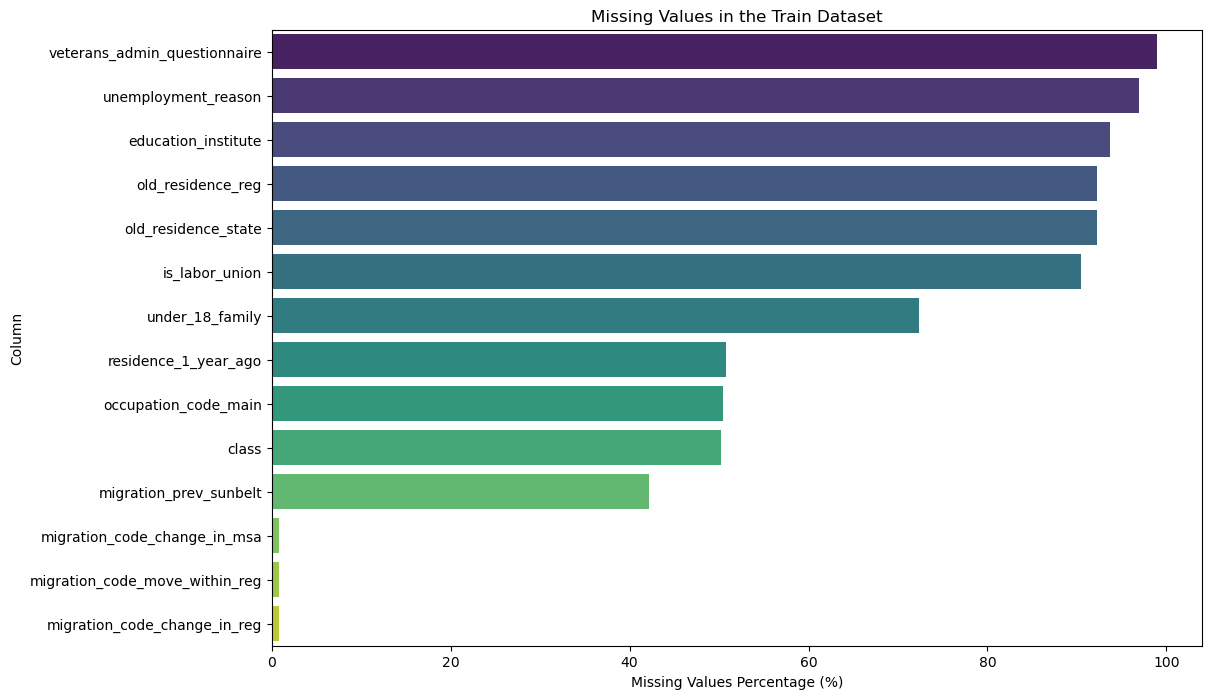

Missing values in the Test dataset:
***********************************
                        Column  Missing Values  Missing Values Percentage (%)
  veterans_admin_questionnaire           88859                          98.97
           unemployment_reason           87106                          97.02
           education_institute           84170                          93.75
             old_residence_reg           82670                          92.07
           old_residence_state           82670                          92.07
                is_labor_union           81322                          90.57
               under_18_family           64972                          72.36
          residence_1_year_ago           45597                          50.78
          occupation_code_main           45273                          50.42
                         class           45079                          50.21
        migration_prev_sunbelt           37724                        

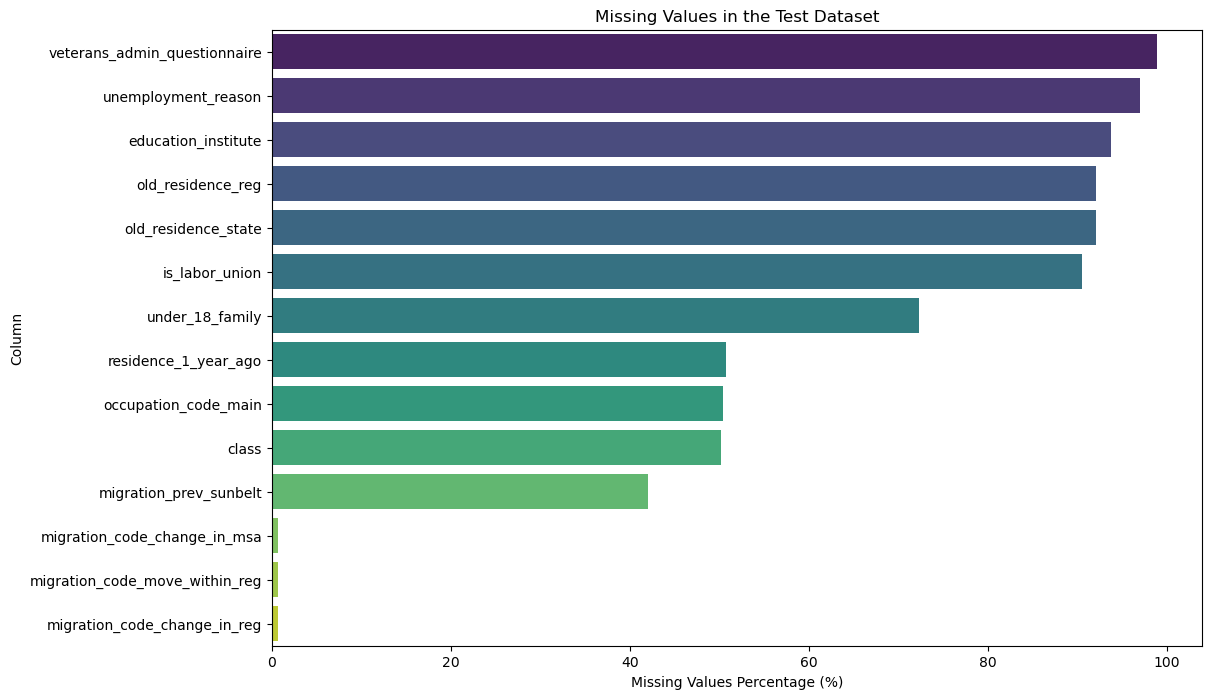

In [12]:
# Define The datasets
datasets = {'train': train_df, 'test': test_df}

# Define a function to print the missing values in the datasets
def show_missing_values(datasets):
    for name, data in datasets.items():
        title = f"Missing values in the {name.capitalize()} dataset:"

        # Create an underline of asterisks
        underline = '*' * len(title)
        print(title)
        print(underline)

        # Calculate the sum of missing values for each column
        missing_values = data.isnull().sum()

        # Exclude columns with 0 as missing values
        missing_values = missing_values[missing_values > 0]

        # Check if there are any columns with missing values
        if not missing_values.empty:

            # Calculate the percentage of missing values
            missing_percentages = ((missing_values / len(data)) * 100).round(2)

            # Create a DataFrame with columns sorted by missing values percentage (highest to lowest)
            missing_info = pd.DataFrame({
                'Column': missing_values.index,
                'Missing Values': missing_values,
                'Missing Values Percentage (%)': missing_percentages
            })

            # Sort the DataFrame by missing values percentage in descending order
            missing_info = missing_info.sort_values(by='Missing Values Percentage (%)', ascending=False)

            # Use to_string to remove index column
            print(missing_info.to_string(index=False))
            print('===' * 26)
        else:
            # If no missing values found, indicate that
            print("No missing values found.")
        print()
        # Set the plot size
        plt.figure(figsize=(12, 8))

        # Create a horizontal bar graph with the Viridis palette
        ax = sns.barplot(x="Missing Values Percentage (%)", y="Column", data=missing_info, palette="viridis")

        # Set the axis labels and title
        ax.set(xlabel="Missing Values Percentage (%)", ylabel="Column", title=f"Missing Values in the {name.capitalize()} Dataset")

        # Display the plot
        plt.show()

# Call the function to show missing values in the datasets
show_missing_values(datasets)

Some columns such as veterans_admin_questionnaire, unemployment_reason, education_institute, old_residence_reg, old_residence_state, is_labor_union, and under_18_family have more than 70% of missing values. These need to be handled.

In [13]:
# Define a function to print unique values and missing value percentages for columns with missing values
def print_unique_and_missing(dataset):
    for column in dataset.columns:
        if dataset[column].isnull().any():

            # Calculate the missing values percentage
            missing_percentage = (dataset[column].isnull().sum() / len(dataset)) * 100

            # Create an underline of asterisks
            underline = '*' * len(f"Column: {column}")
            print(f"Column: {column}")
            print(underline)

            # Print the unique values
            unique_values = dataset[column].unique()
            print(f"Unique Values: {unique_values}")

            # Print the missing values percentage
            print(f"Missing Values Percentage: {missing_percentage:.2f}%")
            print('===' * 26)
            print()


# Print unique values and missing value percentages for columns with missing values in the 'train' dataset
print("Unique values and missing value percentages in the 'train' dataset:")
print_unique_and_missing(train_df)

Unique values and missing value percentages in the 'train' dataset:
Column: class
*************
Unique Values: [nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked']
Missing Values Percentage: 50.24%

Column: education_institute
***************************
Unique Values: [nan ' High school' ' College or university']
Missing Values Percentage: 93.65%

Column: unemployment_reason
***************************
Unique Values: [nan ' Other job loser' ' Re-entrant' ' Job leaver'
 ' Job loser - on layoff' ' New entrant']
Missing Values Percentage: 96.89%

Column: is_labor_union
**********************
Unique Values: [nan ' No' 'Same']
Missing Values Percentage: 90.42%

Column: occupation_code_main
****************************
Unique Values: [nan ' Adm support including clerical' ' Other service'
 ' Executive admin and managerial' ' Sales'
 ' Machine operators assmblrs & inspct

In [14]:
# Print unique values and missing value percentages for columns with missing values in the 'test' dataset
print("Unique values and missing value percentages in the 'test' dataset:")
print_unique_and_missing(test_df)

Unique values and missing value percentages in the 'test' dataset:
Column: class
*************
Unique Values: [' Private' nan ' Federal government' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Never worked' ' Without pay']
Missing Values Percentage: 50.21%

Column: education_institute
***************************
Unique Values: [nan ' High school' ' College or university']
Missing Values Percentage: 93.75%

Column: unemployment_reason
***************************
Unique Values: [nan ' Re-entrant' ' Other job loser' ' New entrant'
 ' Job loser - on layoff' ' Job leaver']
Missing Values Percentage: 97.02%

Column: is_labor_union
**********************
Unique Values: [' No' nan 'Same']
Missing Values Percentage: 90.57%

Column: occupation_code_main
****************************
Unique Values: [' Transportation and material moving'
 ' Machine operators assmblrs & inspctrs' ' Professional specialty' nan
 ' Adm support including cle

###### Handling Missing Values and Leading Blank Spaces
In this section, we address missing values in the dataset. Proper handling of missing data is crucial for robust analysis and ensures data consistency.

There are several instances of '?' in different columns of the dataset. These should be replaced with NaN values since they also symbolize missing values.

We observed that some columns such as the 'class' and 'occupation_code_main' columns have leading blank spaces that may impact data analysis. We must remove these spaces and replace the '?' with NaN, we use the following code:

In [15]:
def process_dataset(dataset):

    # Remove leading spaces from all columns in the dataset
    dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Replace '?' with NaN for the entire DataFrame
    dataset = dataset.replace('?', np.nan)

    return dataset

In [16]:
# Process the 'train' dataset
train_df = process_dataset(train_df)

# Process the 'test' dataset
test_df = process_dataset(test_df)

# Define a function to print unique values and missing value percentages for columns with missing values
def print_missing_values(dataset):
    for column in dataset.columns:
        if dataset[column].isnull().any():
            unique_values = dataset[column].unique()

            # Calculate the missing values percentage
            missing_percentage = (dataset[column].isnull().sum() / len(dataset)) * 100

            # Create an underline of asterisks
            underline = '*' * len(f"Column: {column}")
            print(f"Column: {column}")
            print(underline)

            # Print the unique values
            print(f"Unique Values: {unique_values}")

            # Print the missing values percentage
            print(f"Missing Values Percentage: {missing_percentage:.2f}%")
            print('===' * 29)
            print()

In [17]:
# Print unique values and missing value percentages for columns with missing values in the 'train' dataset
print_missing_values(train_df)

Column: class
*************
Unique Values: [nan 'Federal government' 'Private' 'Local government'
 'Self-employed-incorporated' 'Self-employed-not incorporated'
 'State government' 'Without pay' 'Never worked']
Missing Values Percentage: 50.24%

Column: education_institute
***************************
Unique Values: [nan 'High school' 'College or university']
Missing Values Percentage: 93.65%

Column: unemployment_reason
***************************
Unique Values: [nan 'Other job loser' 'Re-entrant' 'Job leaver' 'Job loser - on layoff'
 'New entrant']
Missing Values Percentage: 96.89%

Column: is_labor_union
**********************
Unique Values: [nan 'No' 'Same']
Missing Values Percentage: 90.42%

Column: occupation_code_main
****************************
Unique Values: [nan 'Adm support including clerical' 'Other service'
 'Executive admin and managerial' 'Sales'
 'Machine operators assmblrs & inspctrs'
 'Precision production craft & repair' 'Professional specialty'
 'Handlers equip clea

In [18]:
# Print unique values and missing value percentages for columns with missing values in the 'test' dataset
print_missing_values(test_df)

Column: class
*************
Unique Values: ['Private' nan 'Federal government' 'Local government'
 'Self-employed-incorporated' 'Self-employed-not incorporated'
 'State government' 'Never worked' 'Without pay']
Missing Values Percentage: 50.21%

Column: education_institute
***************************
Unique Values: [nan 'High school' 'College or university']
Missing Values Percentage: 93.75%

Column: unemployment_reason
***************************
Unique Values: [nan 'Re-entrant' 'Other job loser' 'New entrant' 'Job loser - on layoff'
 'Job leaver']
Missing Values Percentage: 97.02%

Column: is_labor_union
**********************
Unique Values: ['No' nan 'Same']
Missing Values Percentage: 90.57%

Column: occupation_code_main
****************************
Unique Values: ['Transportation and material moving'
 'Machine operators assmblrs & inspctrs' 'Professional specialty' nan
 'Adm support including clerical' 'Precision production craft & repair'
 'Technicians and related support' 'Execut

In [19]:
# Define a threshold percentage for missing values
threshold = 0.70

# Create an empty list to store columns that exceed the threshold
train_columns_to_drop = []
test_columns_to_drop = []


# Iterate through each column in the train dataset
for col in train_df.columns:

    # Calculate the percentage of missing values for the current column
    missing_percentage = train_df[col].isnull().sum() / len(train_df)

    # Check if the missing percentage is greater than the defined threshold
    if missing_percentage > threshold:

        # If it exceeds the threshold, add the column name to the list
        train_columns_to_drop.append(col)


# Iterate through each column in the test dataset
for col in test_df.columns:

    # Calculate the percentage of missing values for the current column
    missing_percentage = test_df[col].isnull().sum() / len(test_df)

    # Check if the missing percentage is greater than the defined threshold
    if missing_percentage > threshold:

        # If it exceeds the threshold, add the column name to the list
        test_columns_to_drop.append(col)

# Drop the identified columns with high missing values from both the train and test datasets
train_df.drop(columns=train_columns_to_drop, inplace=True)
test_df.drop(columns=test_columns_to_drop, inplace=True)

print(f"Dropped columns in train: {train_columns_to_drop}")
print()
print(f"Dropped columns in test: {test_columns_to_drop}")

Dropped columns in train: ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']

Dropped columns in test: ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


In [20]:
# Define The datasets
datasets = {'train': train_df, 'test': test_df}

# Define a function to print the missing values in the datasets
def show_missing_values(datasets):
    for name, data in datasets.items():
        title = f"Missing values in the {name.capitalize()} dataset:"

        # Create an underline of asterisks
        underline = '*' * len(title)
        print(title)
        print(underline)

        # Calculate the sum of missing values for each column
        missing_values = data.isnull().sum()

        # Exclude columns with 0 as missing values
        missing_values = missing_values[missing_values > 0]

        # Check if there are any columns with missing values
        if not missing_values.empty:

            # Calculate the percentage of missing values
            missing_percentages = ((missing_values / len(data)) * 100).round(2)

            # Display the columns with missing values, the count of missing values, and their percentages
            missing_info = pd.DataFrame({
                'Column': missing_values.index,
                'Missing Values': missing_values,
                'Missing Values Percentage (%)': missing_percentages
            })

            # Use to_string to remove index column
            print(missing_info.to_string(index=False))
            print('===' * 26)
        else:
            # If no missing values found, indicate that
            print("No missing values found.")
        print()

# Call the function to show missing values in the datasets
show_missing_values(datasets)

Missing values in the Train dataset:
************************************
                        Column  Missing Values  Missing Values Percentage (%)
                         class          105245                          50.24
          occupation_code_main          105694                          50.45
          country_of_birth_own            3667                           1.75
       country_of_birth_father            7181                           3.43
       country_of_birth_mother            6516                           3.11
  migration_code_change_in_msa          106284                          50.73
migration_code_move_within_reg          106284                          50.73
  migration_code_change_in_reg          106284                          50.73
          residence_1_year_ago          106284                          50.73

Missing values in the Test dataset:
***********************************
                        Column  Missing Values  Missing Values Percentage

##### `class` and `occupation_code_main`

- **Class:** This column represents an individual's working class and has a missing value percentage of approximately 50.24%. The class of worker indicates whether a person is employed in various sectors, including the federal government, private sector, local government, state government, self-employed, or if they have never been employed or are working without pay. This column is crucial for analysis as an individual's worker class may significantly impact their income. Therefore, it is essential to retain and further analyze this column to develop an appropriate strategy for handling the missing values.


- **Occupation Code Main:** This column denotes the major occupation code of an individual and also has a missing values percentage of around 50.45%.


- **Handling Strategy:** Given the substantial percentage of missing values, we can consider imputing these gaps. One approach is to replace missing values with the most common class or occupation in each column (mode imputation).

In [21]:
# Handling the missing values in the 'Class' Column by observing neighbouring columns
train_df["class"].unique()

array([nan, 'Federal government', 'Private', 'Local government',
       'Self-employed-incorporated', 'Self-employed-not incorporated',
       'State government', 'Without pay', 'Never worked'], dtype=object)

In [22]:
# Display the rows with null values in the 'class' column
null_class = train_df[train_df["class"].isnull()]
null_class

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,...,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
3,ID_TZ0003,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit
8,ID_TZ0008,73,Female,7th and 8th grade,NaN,Married-civilian spouse present,Black,All other,Not in labor force,0,...,95,US,US,US,NaN,NaN,NaN,NaN,1267.30,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209488,ID_TZ9999,76,Female,Some college but no degree,NaN,Never married,White,All other,Not in labor force,0,...,95,US,NaN,NaN,NaN,NaN,NaN,NaN,2570.89,Below limit
209492,ID_TZ99993,44,Female,1st 2nd 3rd or 4th grade,NaN,Married-civilian spouse present,White,Mexican (Mexicano),Not in labor force,0,...,95,Mexico,Mexico,Mexico,NaN,NaN,NaN,NaN,1142.78,Below limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,Never married,White,All other,Not in labor force,0,...,95,US,US,US,NaN,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,Married-civilian spouse present,White,All other,Not in labor force,0,...,95,US,US,Canada,NaN,NaN,NaN,NaN,1029.57,Below limit


When examining the rows with missing values in the 'Class' column, it appears that some individuals are primarily young (below 18), with 'Not in labor force' and 'Children or Armed Forces' listed as their 'employment_commitment' status. This suggests that some missing values in the 'Class' column are due to individuals who are children or not yet part of the labor force due to their age. These should be investigated further.

In [23]:
# Check remaining missing values in the 'class' column
missing_values_before_imputation_train = train_df['class'].isnull().sum()
missing_values_before_imputation_test = test_df['class'].isnull().sum()
print(f"Missing values in 'class' column for Train before imputation: {missing_values_before_imputation_train}")
print(f"Missing values in 'class' column for Test before imputation: {missing_values_before_imputation_test}")

Missing values in 'class' column for Train before imputation: 105245
Missing values in 'class' column for Test before imputation: 45079


In [24]:
train_df["class"].value_counts()

Private                           75617
Self-employed-not incorporated     8957
Local government                   8093
State government                   4480
Self-employed-incorporated         3444
Federal government                 3047
Never worked                        449
Without pay                         167
Name: class, dtype: int64

The most frequent class is **Private**. Therefore, we should impute the missing values in the 'class' column with this most frequnt class (mode).

In [25]:
# Impute missing values in the 'class' column with the most frequent class
# Define the imputation value
imputation_value = train_df['class'].mode()[0]

# Impute missing 'class' values with the most frequent class in the 'train' dataset
train_df['class'].fillna(imputation_value, inplace=True)
test_df['class'].fillna(imputation_value, inplace=True)

# Verify the imputation in both DataFrames
missing_values_after_imputation_train = train_df['class'].isnull().sum()
missing_values_after_imputation_test = test_df['class'].isnull().sum()
print(f"Missing values in 'class' column for Train after imputation: {missing_values_after_imputation_train}")
print(f"Missing values in 'class' column for Test after imputation: {missing_values_after_imputation_test}")

Missing values in 'class' column for Train after imputation: 0
Missing values in 'class' column for Test after imputation: 0


In [26]:
# Handling Missing Values for 'occupation_code_main' column by observing neighbouring columns
train_df["occupation_code_main"].unique()

array([nan, 'Adm support including clerical', 'Other service',
       'Executive admin and managerial', 'Sales',
       'Machine operators assmblrs & inspctrs',
       'Precision production craft & repair', 'Professional specialty',
       'Handlers equip cleaners etc',
       'Transportation and material moving',
       'Farming forestry and fishing', 'Private household services',
       'Technicians and related support', 'Protective services',
       'Armed Forces'], dtype=object)

- The column "occupation_code_main" represents the major occupation code of individuals, and it has various unique values that describe different occupation categories.


- These values include 'Adm support including clerical,' 'Sales,' 'Machine operators assmblrs & inspctrs,' 'Professional specialty,' 'Transportation and material moving,' and more.


- This column is essential for understanding the occupation of individuals in the dataset because it indicates the occupation of an individual which might have a relationship with their income since some occupations tend to pay more than others.

In [27]:
train_df["occupation_code"].unique()

array([ 0, 26, 31,  2, 17, 36, 33,  8, 10, 40, 29, 39, 23, 34, 43, 38,  3,
       35, 19, 25, 27, 24, 30,  1, 32, 15,  5, 28, 37, 12,  4, 16,  7, 14,
       44, 18, 13,  9, 42, 21, 41, 22, 11, 45,  6, 20, 46], dtype=int64)

In [28]:
# Check missing values in 'occupation_code_main' column before imputation
missing_values_before = train_df['occupation_code_main'].isnull().sum()
print(f"Missing values in 'occupation_code_main' before imputation: {missing_values_before}")

Missing values in 'occupation_code_main' before imputation: 105694


In [29]:
# Display the rows with null values in the 'occupation_code_main' column
null_occupation = train_df[train_df["occupation_code_main"].isnull()]

# Display specific columns in the DataFrame
null_occupation[['age', 'occupation_code_main', 'occupation_code', 'education']]

,age,occupation_code_main,occupation_code,education
0,79,NaN,0,High school graduate
1,65,NaN,0,High school graduate
3,2,NaN,0,Children
4,70,NaN,0,High school graduate
8,73,NaN,0,7th and 8th grade
...,...,...,...,...
209488,76,NaN,0,Some college but no degree
209492,44,NaN,0,1st 2nd 3rd or 4th grade
209494,16,NaN,0,7th and 8th grade
209495,78,NaN,0,Bachelors degree(BA AB BS)


In [30]:
# Display the rows with null values in the 'occupation_code_main' column
not_null_occupation = train_df[train_df["occupation_code_main"].notnull()]

# Display specific columns in the DataFrame
not_null_occupation[['age', 'occupation_code_main', 'occupation_code', 'education']]

,age,occupation_code_main,occupation_code,education
2,21,Adm support including clerical,26,12th grade no diploma
5,45,Other service,31,Bachelors degree(BA AB BS)
6,53,Executive admin and managerial,2,High school graduate
7,22,Sales,17,High school graduate
9,22,Machine operators assmblrs & inspctrs,36,11th grade
...,...,...,...,...
209490,23,Professional specialty,4,Bachelors degree(BA AB BS)
209491,65,Adm support including clerical,26,Bachelors degree(BA AB BS)
209493,26,Other service,31,Associates degree-occup /vocational
209497,26,Handlers equip cleaners etc,42,Some college but no degree


In [31]:
not_null_occupation['occupation_code'].unique()

array([26, 31,  2, 17, 36, 33,  8, 10, 40, 29, 39, 23, 34, 43, 38,  3, 35,
       19, 25, 27, 24, 30,  1, 32, 15,  5, 28, 37, 12,  4, 16,  7, 14, 44,
       18, 13,  9, 42, 21, 41, 22, 11, 45,  6, 20, 46], dtype=int64)

In [32]:
null_occupation['occupation_code'].unique()

array([0], dtype=int64)

We cannot use the 'occupation_code' column to use the not_null_occupation dataframe to map the missing values of the 'occupation_code_main' column in the null_occupation dataframe. This is because all the missing values have '0' as their occupation_code which is not present in the not_null_occupation dataframe.

In [33]:
# Replace remaining null values in 'occupation_code_main' column with 'Unknown' for both train and test dataframes
train_df['occupation_code_main'].fillna('Unknown', inplace=True)
test_df['occupation_code_main'].fillna('Unknown', inplace=True)

# Check missing values in 'occupation_code_main' column after imputation for both dataframes
missing_values_after_train = train_df['occupation_code_main'].isnull().sum()
missing_values_after_test = test_df['occupation_code_main'].isnull().sum()

# Check missing values in 'occupation_code_main' column
print(f"Missing values in 'occupation_code_main' for the train dataframe after imputation: {missing_values_after_train}")
print(f"Missing values in 'occupation_code_main' for the test dataframe after imputation: {missing_values_after_test}")

Missing values in 'occupation_code_main' for the train dataframe after imputation: 0
Missing values in 'occupation_code_main' for the test dataframe after imputation: 0


##### `country_of_birth_own`, `country_of_birth_father`, and `country_of_birth_mother`

- **Handling Strategy:** Given that these columns have a relatively low percentage of missing values (approximately 1.66%, 3.30%, and 2.98% respectively), we can consider imputing the missing values using mode imputation. This means replacing the missing values in each column with the most common value observed in that specific column. Mode imputation is suitable for these columns as it retains the existing distribution of values while filling in the gaps.

In [34]:
# Columns to impute using mode imputation
columns_to_impute = ['country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother']

# Loop through the specified columns and perform mode imputation for the train dataset
for column in columns_to_impute:
    mode_value_train = train_df[column].mode()[0]
    train_df[column].fillna(mode_value_train, inplace=True)

# Perform mode imputation for the test dataset
for column in columns_to_impute:
    mode_value_test = test_df[column].mode()[0]
    test_df[column].fillna(mode_value_test, inplace=True)

##### `migration_code_change_in_msa`, `migration_code_move_within_reg`, `migration_code_change_in_reg`, and `residence_1_year_ago`

- These columns have a relatively high percentage of missing values (around 50.73 for the train_df and 50.78% for the test_df).
- **Handling Strategy:** We need to check whether the columns are relevant for our analysis before going ahead with an appropriate imputation strategy.

In [35]:
# Assess the relevance of the columns
relevant_columns = ['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago']

for column in relevant_columns:
    # Check unique values to assess relevance
    unique_values = train_df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")
    print('===' * 26)
    print()

Unique values for 'migration_code_change_in_msa': [nan 'unchanged' 'MSA to MSA' 'NonMSA to nonMSA' 'MSA to nonMSA'
 'Not identifiable' 'NonMSA to MSA' 'Abroad to MSA' 'Abroad to nonMSA']

Unique values for 'migration_code_move_within_reg': [nan 'unchanged' 'Same county' 'Different state in South'
 'Different county same state' 'Different state in West'
 'Different state in Northeast' 'Abroad' 'Different state in Midwest']

Unique values for 'migration_code_change_in_reg': [nan 'unchanged' 'Same county' 'Different state same division'
 'Different county same state' 'Different region' 'Abroad'
 'Different division same region']

Unique values for 'residence_1_year_ago': [nan 'Same' 'No']



In [36]:
# List of columns to drop
columns_to_drop = ['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago']

# Drop the specified columns from the train DataFrame
train_df.drop(columns=columns_to_drop, inplace=True)

# Drop the specified columns from the test DataFrame
test_df.drop(columns=columns_to_drop, inplace=True)

- The decision to drop the columns 'migration_code_change_in_msa,' 'migration_code_move_within_reg,' 'migration_code_change_in_reg,' and 'residence_1_year_ago' is supported by the unique values observed in these columns.

- Given the high percentage of missing values and the nature of the unique values, it is unlikely that these columns will significantly impact the prediction of an individual's income.

- The unique values are either missing, indicating an unchanged status, or showing various types of transitions in residence, which may not provide meaningful information for predicting income.

- Consequently, removing these columns is a logical step to streamline the dataset and enhance the accuracy and interpretability of the analysis or predictive model.

In [37]:
# Confirm if there are any missing values left in the train and test datasets.
# Calculate the number of missing values in the 'train_df' and 'test_df' dataframes
missing_values_train = train_df.isnull().sum().sum()
missing_values_test = test_df.isnull().sum().sum()

# Print the number of missing values
print(f"Number of missing values in 'train_df': {missing_values_train}")
print(f"Number of missing values in 'test_df': {missing_values_test}")

Number of missing values in 'train_df': 0
Number of missing values in 'test_df': 0


We have handled all the missing values in the train and test datasets.

# Univariate, Bivariate and Multivariate Analysis

## Univariate Analysis

### i. Distribution of The Target Column (Income Levels)

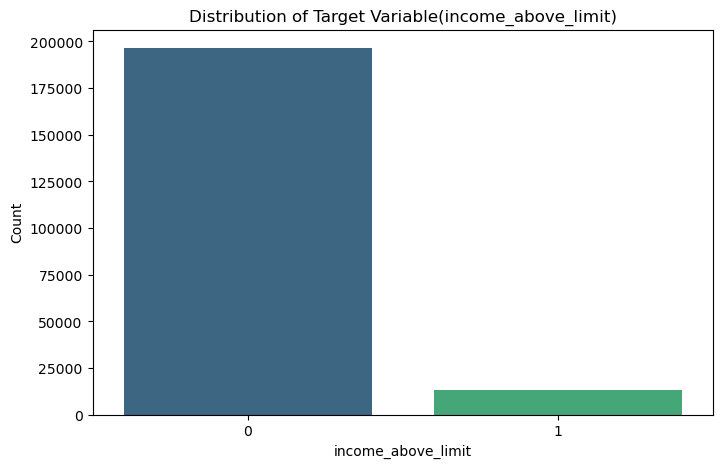

Insights for the Distribution of Sepsiss:
- There are 12998 participants with income above 50k (Above Limit) and 196501 below 50k (Below Limit).


In [38]:
# Mapping the values in the target column
train_df['income_above_limit'] = train_df['income_above_limit'].map({'Below limit': 0, 'Above limit': 1})

# Plot the distribution of The Target Column
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='income_above_limit', palette='viridis')
plt.title('Distribution of Target Variable(income_above_limit)')
plt.xlabel('income_above_limit')
plt.ylabel('Count')
plt.show()


# Insights
income_counts = train_df['income_above_limit'].value_counts()
print("Insights for the Distribution of Sepsiss:")
print(f"- There are {income_counts[1]} participants with income above 50k (Above Limit) and {income_counts[0]} below 50k (Below Limit).")

This reveals a significant class imbalance, with a relatively small number of participants in the high-income category compared to the low-income category. This significant disparity in class distribution may have implications for modeling and predictive accuracy. Class imbalances can lead to models that are biased toward the majority class, potentially impacting the model's ability to accurately predict the minority class (Above Limit). Addressing this class imbalance through techniques like oversampling, undersampling, or using appropriate evaluation metrics will be important in building a robust income prediction model.

### Iii. Distribution of Age.

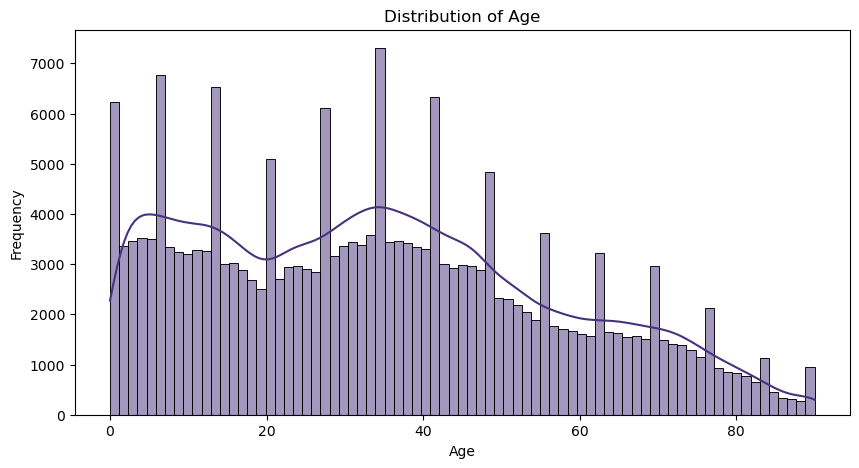

Summary Statistics for Age:
count    209499.000000
mean         34.518728
std          22.306738
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64


In [39]:
# Extract the 'Age' column
age_values = train_df['age']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(age_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Age:')
print(age_values.describe())

- The average age is approximately 34.52 years.
- 25% of individuals are 15 years old or younger.
- The median age is 33 years.
- 75% of individuals are 50 years old or younger.
- The oldest individual in the dataset is 90 years old.

### iii. Distribution of Gender

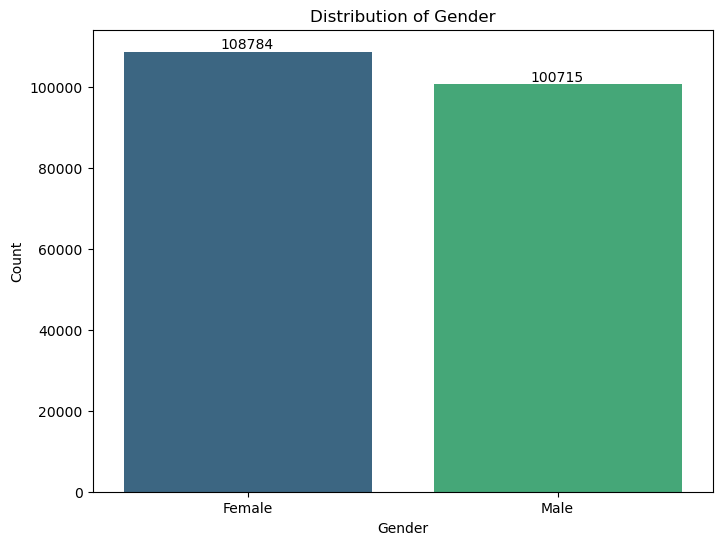

In [40]:
# Calculate the count of each category in 'gender'
gender_counts = train_df['gender'].value_counts()

# Countplot for 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=train_df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the count on top of each bar
for index, value in enumerate(gender_counts):
    plt.text(index, value + 100, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

- There are 108,784 individuals identified as female and 100,715 individuals identified as male in the dataset.

### iv. Distribution of Participants by Education Level

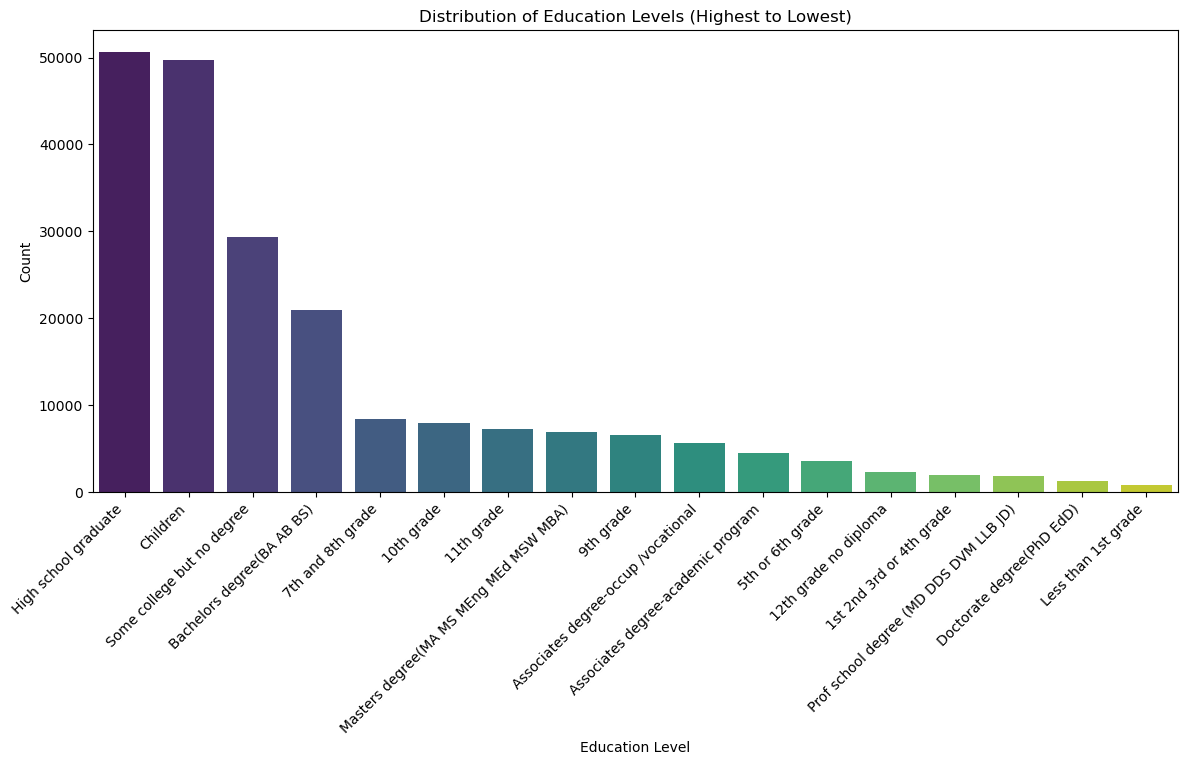

In [41]:
# Calculate the count of each category in 'education' and sort by count
education_counts = train_df['education'].value_counts().sort_values(ascending=False)

# Countplot for 'education' arranged from highest to lowest count
plt.figure(figsize=(14, 6))
sns.countplot(x='education', data=train_df, order=education_counts.index, palette='viridis')
plt.title('Distribution of Education Levels (Highest to Lowest)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
# Show education counts
education_counts

High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: education, dtype: int64

- **Education Level Distribution:**
  - The most common education levels in the dataset are:
    - High school graduate: 50,627 individuals
    - Children: 49,685 individuals
    - Some college but no degree: 29,320 individuals
    - Bachelors degree(BA AB BS): 20,979 individuals

- **Diversity in Education:**
  - The dataset encompasses a wide range of educational backgrounds, including various grade levels, vocational degrees, and advanced degrees.

- **Prominence of Higher Education:**
  - Notably, there is a presence of individuals with advanced degrees, such as Masters and Doctorate degrees, indicating diversity in educational achievements.

### v. Distribution of Participants by Marital Status

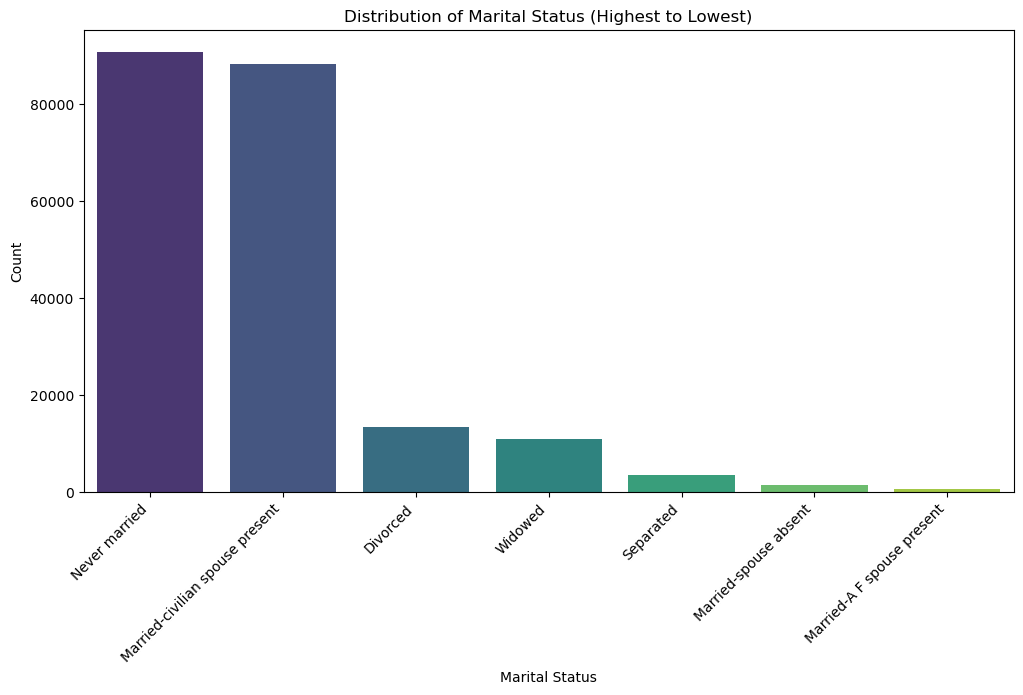

In [43]:
# Calculate the count of each category in 'marital_status' and sort by count
marital_status_counts = train_df['marital_status'].value_counts().sort_values(ascending=False)

# Countplot for 'marital_status' arranged from highest to lowest count
plt.figure(figsize=(12, 6))
sns.countplot(x='marital_status', data=train_df, order=marital_status_counts.index, palette='viridis')
plt.title('Distribution of Marital Status (Highest to Lowest)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
# Marital Status Counts
marital_status_counts

Never married                      90723
Married-civilian spouse present    88407
Divorced                           13456
Widowed                            11029
Separated                           3596
Married-spouse absent               1568
Married-A F spouse present           720
Name: marital_status, dtype: int64

- **Prevalence of Unmarried Individuals:**
  - The majority of individuals in the dataset, with a count of 90,723, are categorized as "Never married." This includes individuals who may be in younger age groups or those who have not entered into marriage, possibly including minors or individuals who have chosen not to marry.
  

- **Significant Presence of Married Individuals:**
  - Marital statuses indicating a form of marriage ("Married-civilian spouse present" and "Married-A F spouse present") collectively account for a substantial portion of the dataset, with counts of 88,407 and 720, respectively.
  

- **Minority Categories:**
  - Less common marital statuses include "Divorced" (13,456 individuals), "Widowed" (11,029 individuals), "Separated" (3,596 individuals), and "Married-spouse absent" (1,568 individuals).

These insights provide a nuanced understanding of the marital status distribution, highlighting the dominance of certain categories and the diversity within the dataset.

### vi. Distribution of Participants by Race

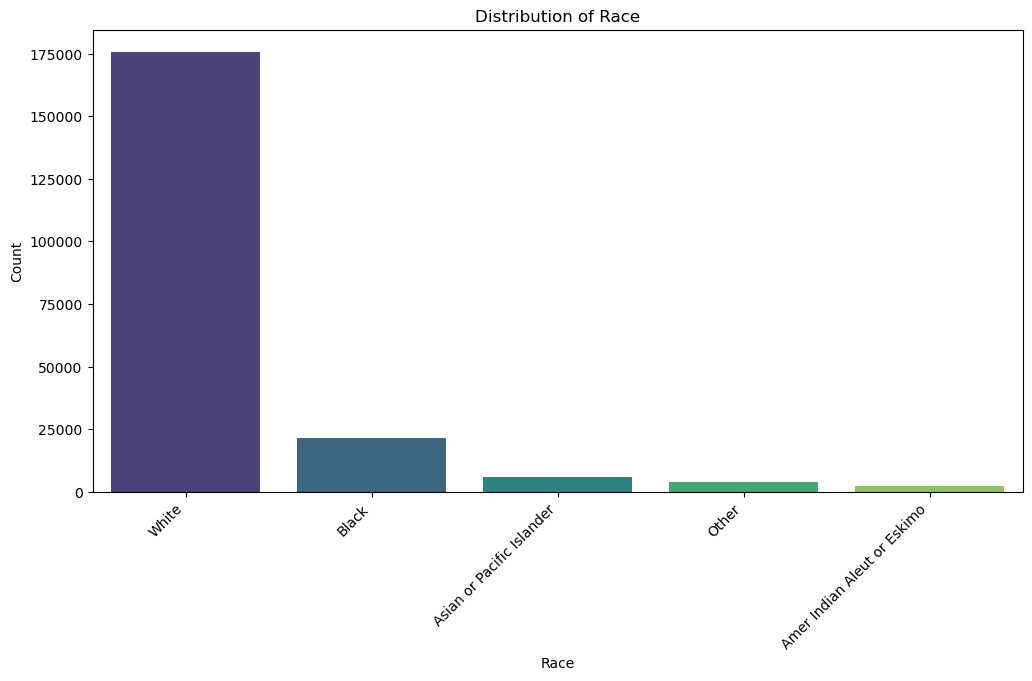

In [45]:
# Calculate the count of each category in 'race'
race_counts = train_df['race'].value_counts()

# Countplot for 'race'
plt.figure(figsize=(12, 6))
sns.countplot(x='race', data=train_df, order=race_counts.index, palette='viridis')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
# Race Counts
race_counts

White                          175709
Black                           21394
Asian or Pacific Islander        6056
Other                            3927
Amer Indian Aleut or Eskimo      2413
Name: race, dtype: int64

- **White Dominance:**
  - The majority of individuals in the dataset belong to the "White" race, with a count of 175,709 individuals.
  

- **Significant Presence of Black Individuals:**
  - Individuals identified as "Black" represent a substantial portion of the dataset, with a count of 21,394.
  

- **Asian and Pacific Islander Representation:**
  - The dataset includes a notable count of individuals categorized as "Asian or Pacific Islander," with 6,056 individuals.
  

- **Other Races:**
  - Other racial categories, including "Other" and "Amer Indian Aleut or Eskimo," contribute to the dataset, with counts of 3,927 and 2,413 individuals, respectively.

### vii. Distribution of Participants by Employment Commitment

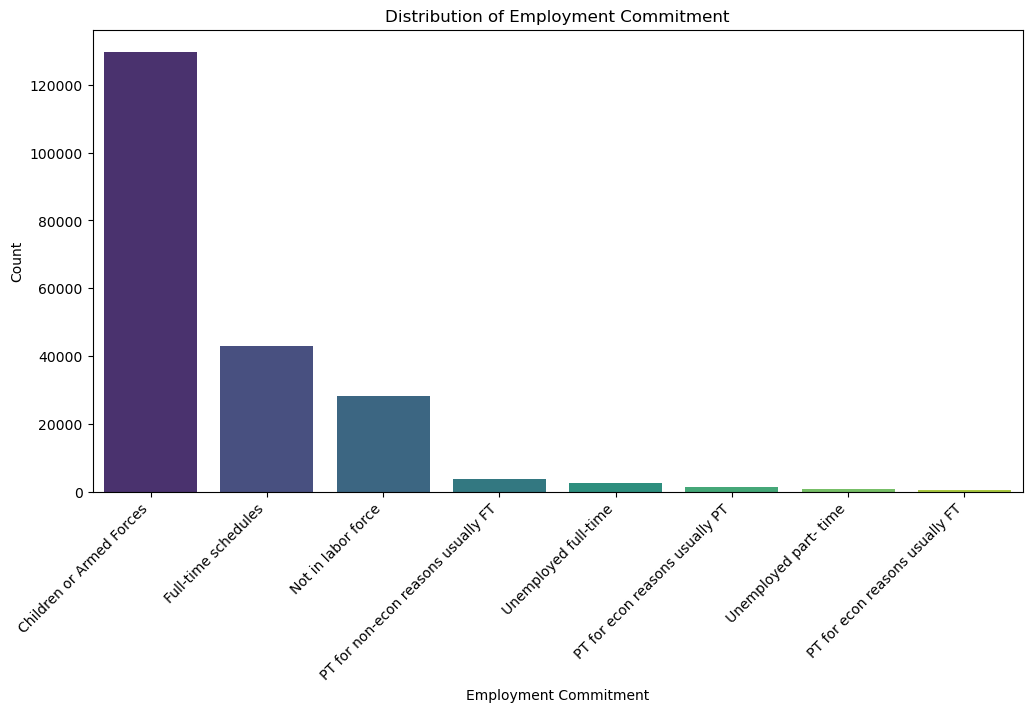

In [47]:
# Calculate the count of each category in 'employment_commitment'
employment_commitment_counts = train_df['employment_commitment'].value_counts()

# Countplot for 'employment_commitment'
plt.figure(figsize=(12, 6))
sns.countplot(x='employment_commitment', data=train_df, order=employment_commitment_counts.index, palette='viridis')
plt.title('Distribution of Employment Commitment')
plt.xlabel('Employment Commitment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
# The count of each category in 'employment_commitment'
employment_commitment_counts

Children or Armed Forces              129789
Full-time schedules                    42787
Not in labor force                     28187
PT for non-econ reasons usually FT      3549
Unemployed full-time                    2538
PT for econ reasons usually PT          1243
Unemployed part- time                    866
PT for econ reasons usually FT           540
Name: employment_commitment, dtype: int64

- **Not in Labor Force Dominance:**
  - A substantial majority of the dataset comprises individuals marked as "Not in Labor Force," with a count of 129,789 individuals.
  

- **Full-Time Schedules:**
  - Individuals committed to full-time schedules contribute significantly to the dataset, with a count of 42,787.
  

- **Part-Time Employment for Non-Economic Reasons:**
  - A noteworthy portion of individuals, with a count of 3,549, is engaged in part-time employment for non-economic reasons, usually intending to work full-time.
  

- **Unemployed Individuals:**
  - The dataset includes individuals who are unemployed, with both full-time (2,538 individuals) and part-time (866 individuals) status.
  

- **Part-Time Employment for Economic Reasons:**
  - Individuals engaged in part-time employment for economic reasons, either usually full-time (540 individuals) or usually part-time (1,243 individuals), are present in the dataset.

### viii. Distribution of Participants by Occupation Code

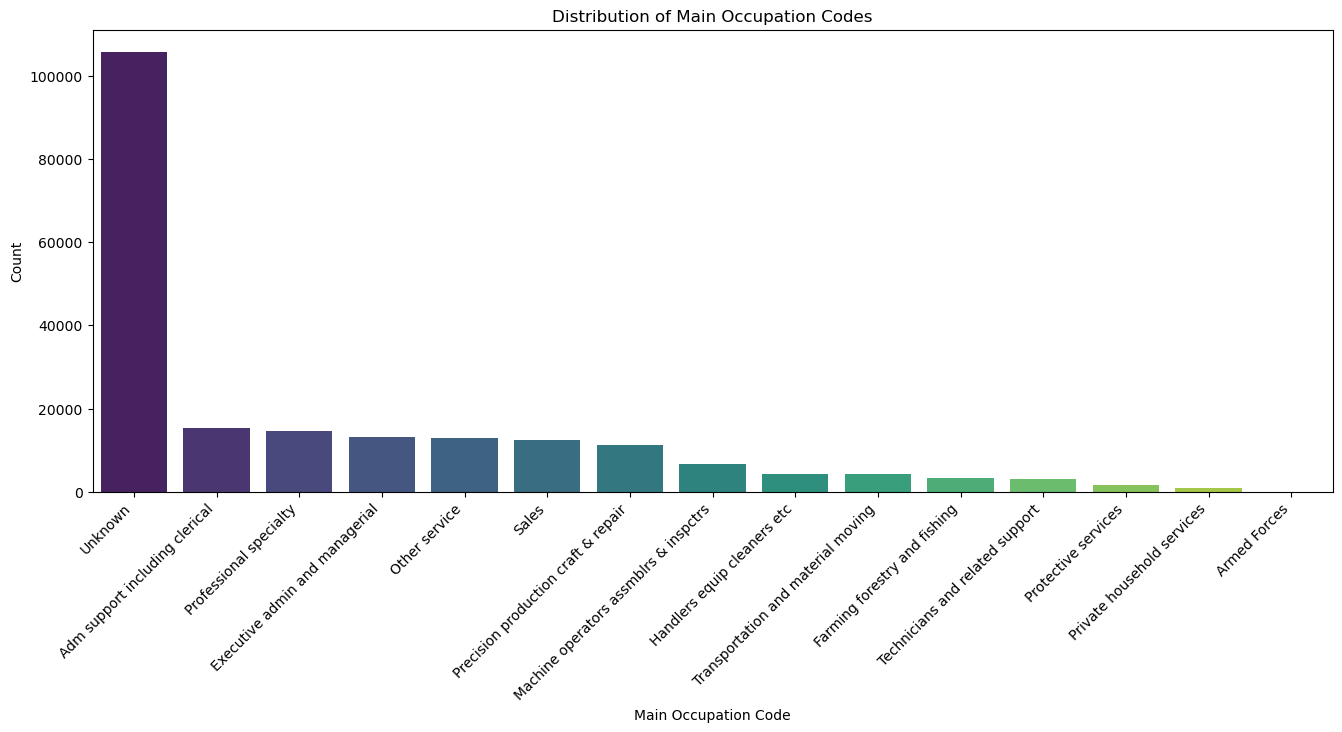

In [49]:
# Calculate the count of each category in 'occupation_code_main'
occupation_code_main_counts = train_df['occupation_code_main'].value_counts()

# Countplot for 'occupation_code_main'
plt.figure(figsize=(16, 6))
sns.countplot(x='occupation_code_main', data=train_df, order=occupation_code_main_counts.index, palette='viridis')
plt.title('Distribution of Main Occupation Codes')
plt.xlabel('Main Occupation Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [50]:
# Count of each category in 'occupation_code_main'
occupation_code_main_counts

Unknown                                  105694
Adm support including clerical            15351
Professional specialty                    14544
Executive admin and managerial            13107
Other service                             12856
Sales                                     12487
Precision production craft & repair       11207
Machine operators assmblrs & inspctrs      6650
Handlers equip cleaners etc                4340
Transportation and material moving         4244
Farming forestry and fishing               3273
Technicians and related support            3136
Protective services                        1700
Private household services                  878
Armed Forces                                 32
Name: occupation_code_main, dtype: int64

- **Unknown Occupation:**
  - The majority of individuals in the dataset have an "Unknown" or unspecified main occupation code, constituting a substantial count of 105,694.
  

- **Administrative and Clerical Roles:**
  - A significant portion of individuals is involved in administrative support, including clerical roles, with a count of 15,351.
  

- **Professional Specialties:**
  - Individuals engaged in professional specialties contribute notably to the dataset, with a count of 14,544.
  

- **Executive and Managerial Roles:**
  - Executive, administrative, and managerial roles are represented, with a count of 13,107.
  

- **Diversity in Occupations:**
  - The dataset includes a diverse set of occupations, ranging from sales and precision production to machine operations, handling equipment, transportation, and more.
  

- **Armed Forces Representation:**
  - A small but distinct representation from the Armed Forces is observed in the dataset, with a count of 32.

### ix. Distribution of Participants by Tax Status

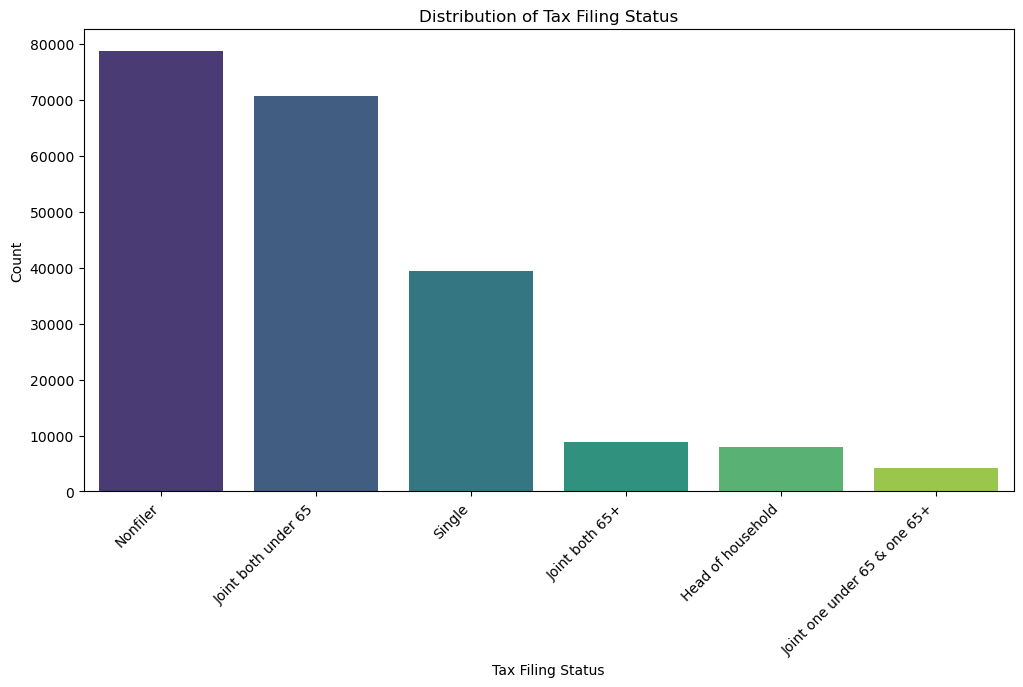

In [51]:
# Calculate the count of each category in 'tax_status'
tax_status_counts = train_df['tax_status'].value_counts()

# Countplot for 'tax_status'
plt.figure(figsize=(12, 6))
sns.countplot(x='tax_status', data=train_df, order=tax_status_counts.index, palette='viridis')
plt.title('Distribution of Tax Filing Status')
plt.xlabel('Tax Filing Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
# Count of each category in 'tax_status'
tax_status_counts

Nonfiler                        78671
Joint both under 65             70617
Single                          39429
Joint both 65+                   8791
Head of household                7882
Joint one under 65 & one 65+     4109
Name: tax_status, dtype: int64

- **Non-Filers Dominance:**
  - A substantial portion of the dataset comprises individuals categorized as "Nonfiler," with a count of 78,671.

- **Joint Filers Under 65:**
  - Individuals filing jointly and both under the age of 65 contribute significantly to the dataset, with a count of 70,617.

- **Single Filers:**
  - Single filers represent a noteworthy portion of the dataset, with a count of 39,429.

- **Joint Filers Both 65+:**
  - There is a presence of individuals filing jointly, and both partners are 65 years or older, with a count of 8,791.

- **Head of Household Filers:**
  - Individuals filing as the head of household contribute to the dataset, with a count of 7,882.

- **Joint Filers Mixed Ages:**
  - The dataset includes individuals filing jointly, where one partner is under 65, and the other is 65 or older, with a count of 4,109.

In [ ]:
# Countplot for Citizenship Status and Income Levels
plt.figure(figsize=(16, 8))
sns.countplot(x='citizenship', hue='income_above_limit', data=train_df, palette='viridis')
plt.title('Citizenship vs. Income Levels')
plt.xlabel('Citizenship Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Bivariate Analysis

## Hypothesis Testing and Answering Key Analytical Questions

### Hypothesis Test

**Null Hypothesis (H0):** There is no significant association between an individual's education level and the likelihood of having an income above the specified threshold.


**Alternative Hypothesis (H1):** Individuals with higher education levels are significantly more likely to have incomes above the specified threshold.

In [53]:
# Create a contingency table for education levels and income categories
contingency_table = pd.crosstab(train_df['education'], train_df['income_above_limit'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)



# Determine the significance level
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
    print("The difference in income categories based on education levels is statistically significant.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to reject the null hypothesis.")
    
# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Reject the null hypothesis
The difference in income categories based on education levels is statistically significant.
Chi-square statistic: 32023.58134968222
P-value: 0.0


- The chi-square test yielded a significant chi-square value of 32023.58.
- The associated p-value of 0.0 indicates an extremely low probability of observing such results by chance.
- Consequently, we reject the null hypothesis, affirming a statistically significant association between education levels and income categories.

### Answering Key Analytical Questions

### i. Does higher education levels correspond to a higher likelihood of having incomes above the threshold.?

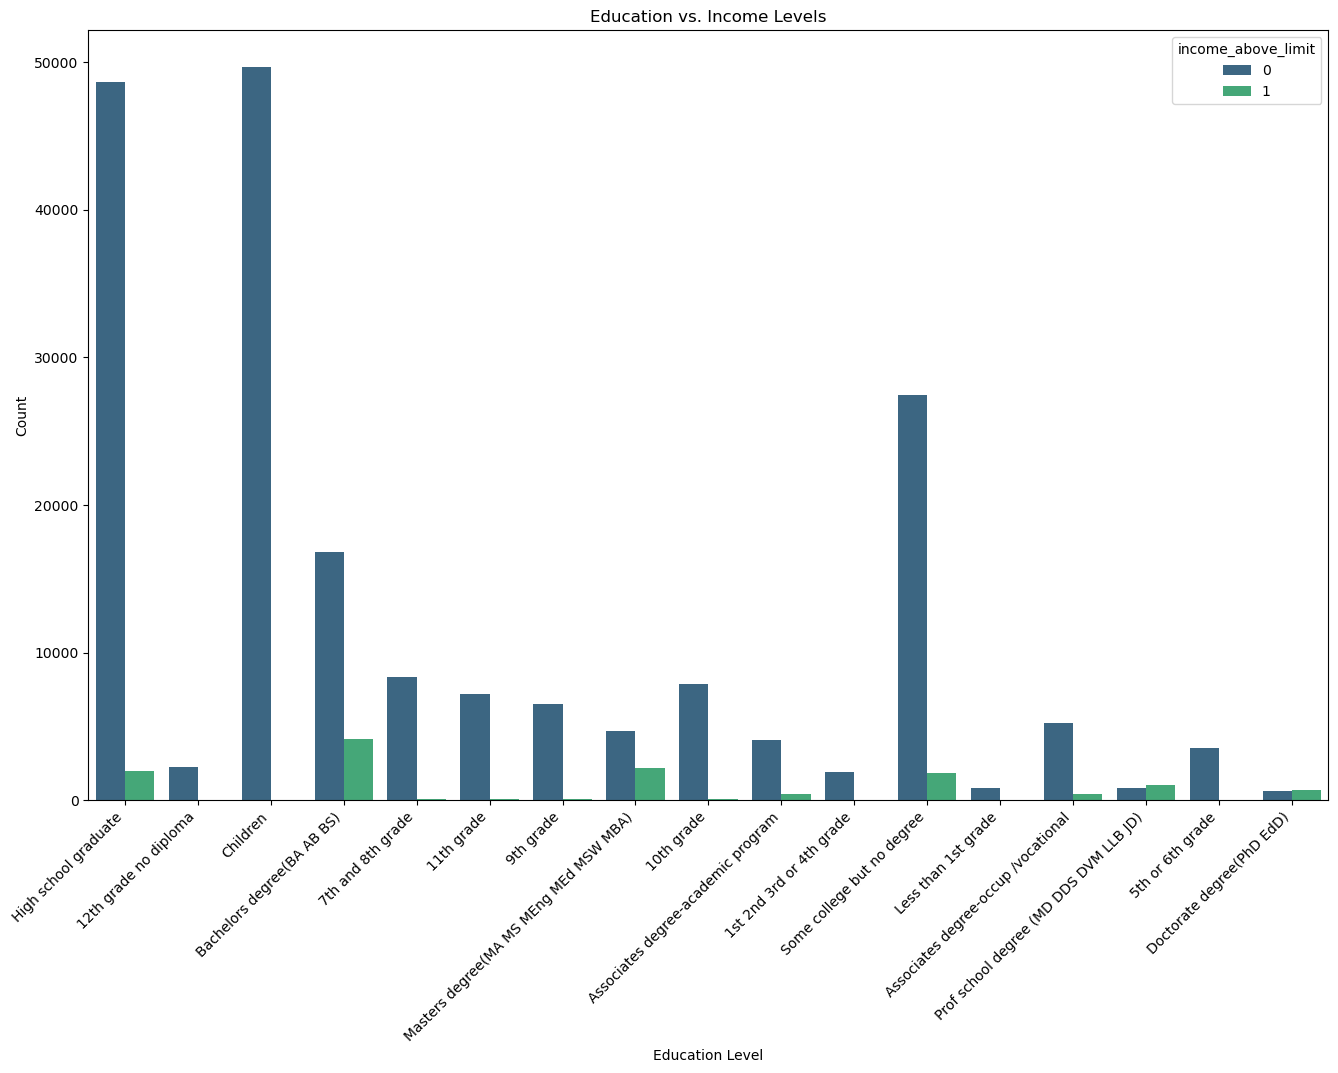

In [54]:
# Countplot for Education and Income Levels
plt.figure(figsize=(16, 10))
sns.countplot(x='education', hue='income_above_limit', data=train_df, palette='viridis')
plt.title('Education vs. Income Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [55]:
# Create a DataFrame with counts for Education vs. Income Levels
education_income_counts = train_df.groupby(['education', 'income_above_limit']).size().reset_index(name='count')

# Print the counts
education_income_counts

,education,income_above_limit,count
0,10th grade,0,7841
1,10th grade,1,64
2,11th grade,0,7178
3,11th grade,1,82
4,12th grade no diploma,0,2247
5,12th grade no diploma,1,35
6,1st 2nd 3rd or 4th grade,0,1902
7,1st 2nd 3rd or 4th grade,1,15
8,5th or 6th grade,0,3512
9,5th or 6th grade,1,30


- There is substantial income inequality, especially at lower education tiers. For instance, individuals with 10th to 12th grade education or below show a notable disparity, with only a small fraction earning incomes above the threshold.


- However, as education levels rise, the distribution becomes more favorable. Bachelor's degree holders exhibit a significant number above the threshold, indicating a positive correlation between higher education and income.


- Notably, the presence of income disparity persists even at higher education levels, such as high school graduates and those with some college education. 


- However, income disparity persists even at higher education levels, suggesting that factors beyond education also contribute to income inequality.


- This corroborates the results of the statistical test we performed on the above hypothesis test as it confirms a positive correlation between higher education levels and a higher likelihood of having incomes above the threshold. Individuals with higher education levels, such as Bachelor's degrees or advanced degrees, show a more favorable distribution, with a significant number having incomes above the specified threshold. 


### ii. How does age relate to income levels in the dataset?

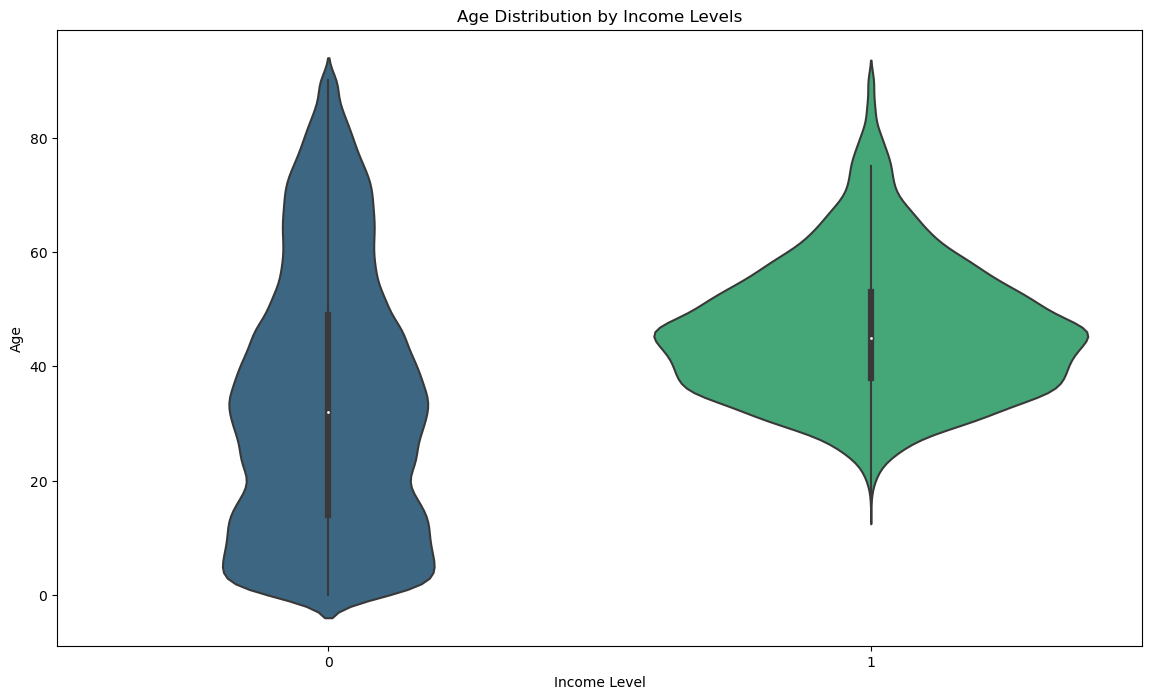

In [56]:
# Violin plot for Age and Income Levels
plt.figure(figsize=(14, 8))
sns.violinplot(x='income_above_limit', y='age', data=train_df, palette='viridis')
plt.title('Age Distribution by Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.show()

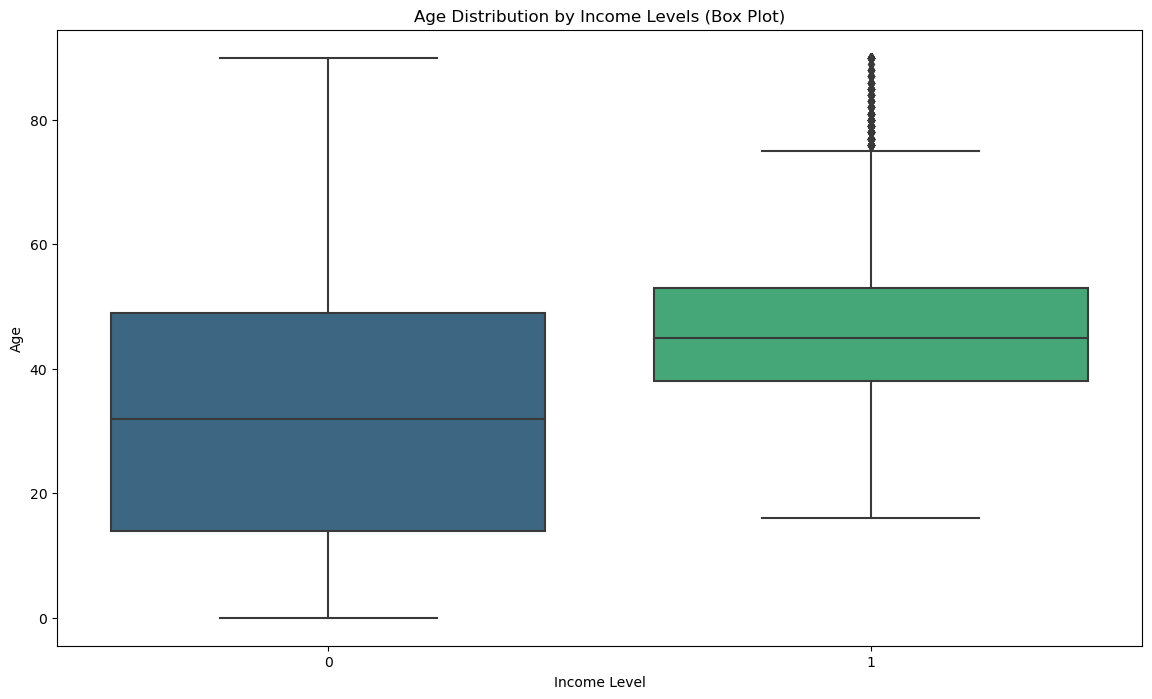

,count,mean,std,min,25%,50%,75%,max
income_above_limit,,,,,,,,
0,196501.0,33.737894,22.617047,0.0,14.0,32.0,49.0,90.0
1,12998.0,46.323204,11.759821,16.0,38.0,45.0,53.0,90.0


In [57]:
# Box plot for Age and Income Levels
plt.figure(figsize=(14, 8))
sns.boxplot(x='income_above_limit', y='age', data=train_df, palette='viridis')
plt.title('Age Distribution by Income Levels (Box Plot)')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.show()

# Descriptive statistics for Age by Income Levels
age_stats = train_df.groupby('income_above_limit')['age'].describe()
age_stats

#### Income Level 0 (Below Limit):
- **Count:** 196,501 individuals
  - **Age Distribution:** Skewed towards younger ages, with 75% of individuals being 49 years old or younger.
  - **Mean Age:** 33.74 years, indicating a relatively younger population.
  - **Observations:** The majority of individuals in this income level are younger, with a few older individuals.

#### Income Level 1 (Above Limit):
- **Count:** 12,998 individuals
  - **Age Distribution:** More evenly distributed, with 75% of individuals being 53 years old or younger.
  - **Mean Age:** 46.32 years, suggesting a slightly older average age compared to the "Below Limit" group.
  - **Observations:** This income level has a broader age range, with individuals spanning from 16 to 90 years old.

In [58]:
# Extract ages for each income level
below_limit_age = train_df[train_df['income_above_limit'] == 0]['age']
above_limit_age = train_df[train_df['income_above_limit'] == 1]['age']

# Perform t-test
t_statistic, p_value = ttest_ind(below_limit_age, above_limit_age)

# Display results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check for significance (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print('The difference in mean age between income groups is statistically significant.')
else:
    print('There is no significant difference in mean age between income groups.')

T-Statistic: -62.88059118466644
P-Value: 0.0
The difference in mean age between income groups is statistically significant.


### Comparative Analysis:

- **Mean Age Comparison:** The average age for individuals above the income limit is higher than those below the limit. This indicates a potential correlation between age and income, with older individuals more likely to be above the income threshold.

- **Age Distribution:** The "Above Limit" group has a more diverse age distribution, encompassing a broader range of ages, while the "Below Limit" group is skewed towards younger ages.

### iii. Is there a significant gender-based income disparity?

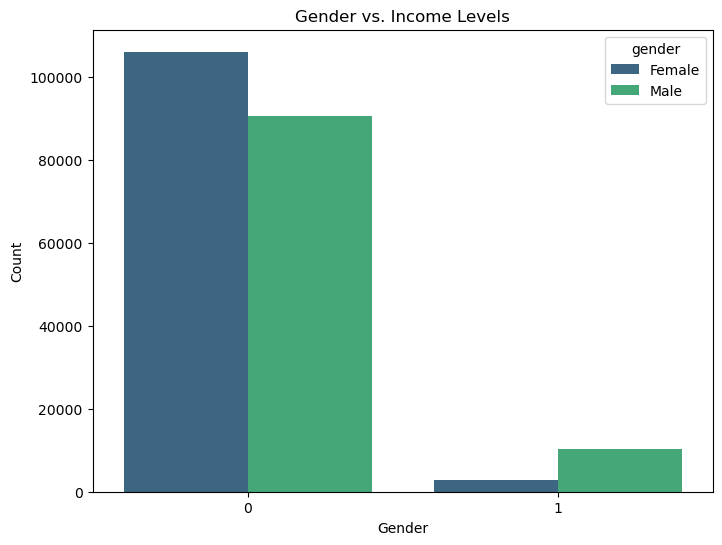

,income_above_limit,gender,count
0,0,Female,105996
1,0,Male,90505
2,1,Female,2788
3,1,Male,10210


In [59]:
# Countplot for Gender and Income Levels
plt.figure(figsize=(8, 6))
sns.countplot(x='income_above_limit', hue='gender', data=train_df, palette='viridis')
plt.title('Gender vs. Income Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Countplot for Gender and Income Levels
gender_income_counts = train_df.groupby(['income_above_limit', 'gender']).size().reset_index(name='count')

# Print the counts
gender_income_counts

#### Income Level 0 (Below Limit):
- **Female:** 105,996 individuals
- **Male:** 90,505 individuals
- **Observation:** A higher count of females falls below the income threshold compared to males.

#### Income Level 1 (Above Limit):
- **Female:** 2,788 individuals
- **Male:** 10,210 individuals
- **Observation:** A notable gender disparity with more males surpassing the income threshold compared to females.

### Gender Income Disparity:
- **Below Limit:** A higher proportion of females is below the income threshold, indicating potential income inequality.
- **Above Limit:** There's a significant gender disparity, with more males exceeding the income threshold, highlighting disparities in income distribution.

These insights underscore the gender-based income disparities, emphasizing the need for targeted interventions to address income inequality, especially for females.

### v. Are there differences in employment status between the two income groups?

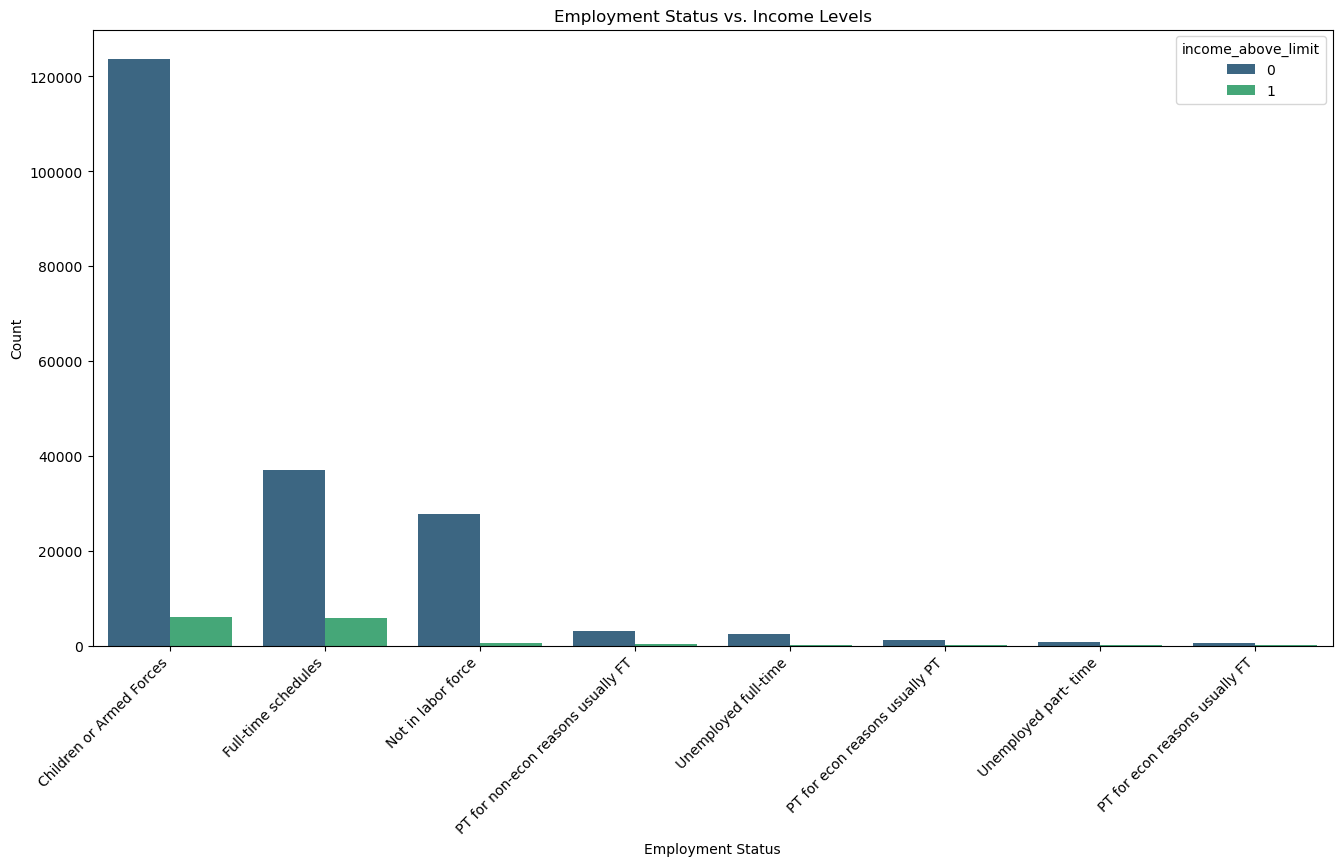

,employment_commitment,income_above_limit,count
0,Children or Armed Forces,0,123690
1,Children or Armed Forces,1,6099
2,Full-time schedules,0,37084
3,Full-time schedules,1,5703
4,Not in labor force,0,27688
5,Not in labor force,1,499
6,PT for econ reasons usually FT,0,513
7,PT for econ reasons usually FT,1,27
8,PT for econ reasons usually PT,0,1074
9,PT for econ reasons usually PT,1,169


In [60]:
# Countplot for Employment Status and Income Levels
plt.figure(figsize=(16, 8))
sns.countplot(x='employment_commitment', hue='income_above_limit', data=train_df, palette='viridis',
              order=train_df['employment_commitment'].value_counts().index)
plt.title('Employment Status vs. Income Levels')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Create a DataFrame with counts for Employment Commitment vs. Income Levels
employment_income_counts = train_df.groupby(['employment_commitment', 'income_above_limit']).size().reset_index(name='count')
employment_income_counts

- Full-time Schedules: Individuals with full-time schedules generally have higher incomes, but there is still a noticeable income gap, with a significant number falling below the threshold, indicating income inequality within this group.


- Not in Labor Force: Despite not being in the labor force, there's a considerable number below the threshold, suggesting that factors other than employment contribute to income disparities.


- Part-time for Economic Reasons: Individuals in part-time roles due to economic reasons have a higher likelihood of falling below the threshold, emphasizing the vulnerability of part-time employment in economic downturns.


- Part-time for Non-economic Reasons: Similar to economic reasons, part-time roles for non-economic reasons also exhibit a higher count below the threshold, indicating challenges in securing full-time positions.


- Unemployed (Full-time and Part-time): Both full-time and part-time unemployed individuals face income disparities, aligning with expectations. The presence of those below the threshold underscores the financial challenges during unemployment.


The disparities in income levels across various employment statuses highlight the complexities of income inequality. While certain groups generally earn more, a significant portion still faces challenges, emphasizing the need for a nuanced understanding of factors contributing to income disparities.

### vi. How do race and ethnicity correlate with income levels in the dataset?

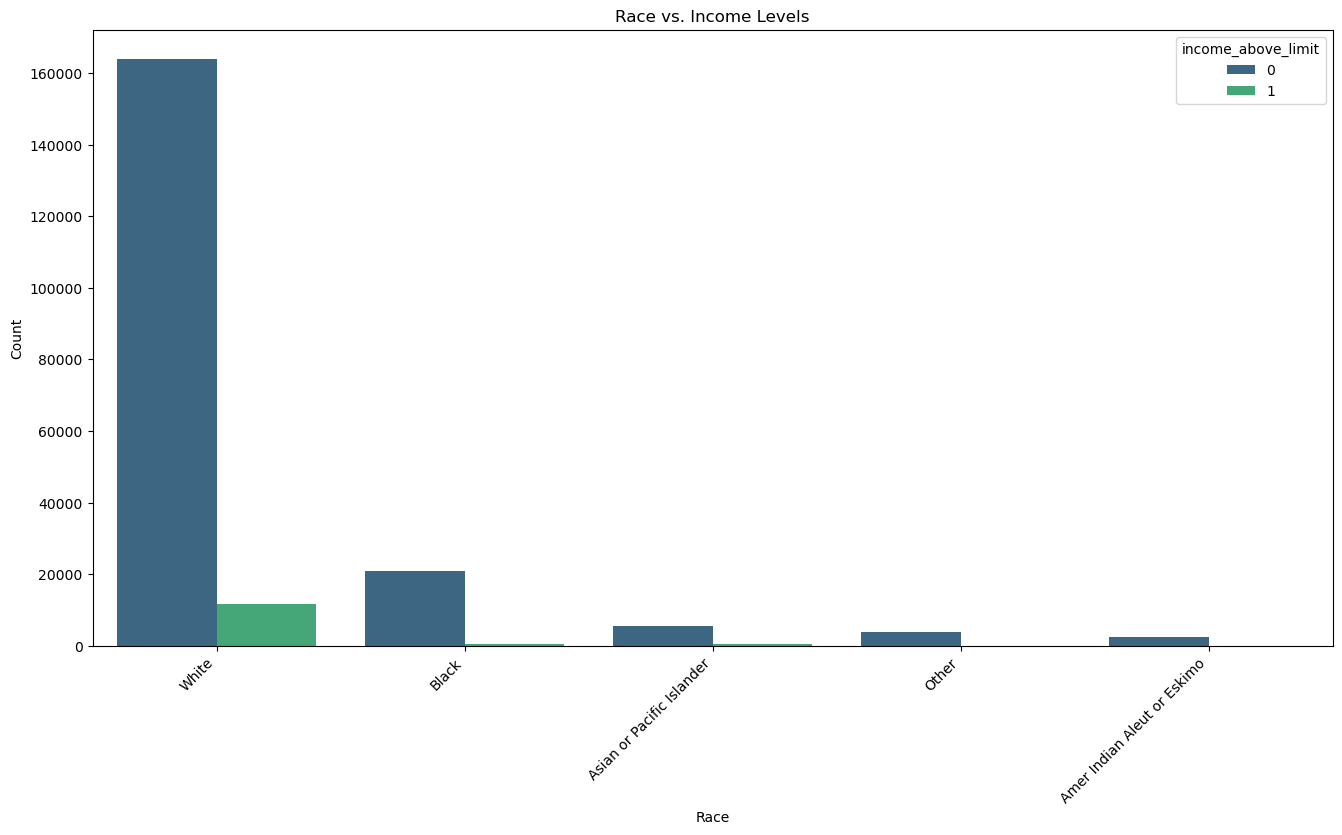

,race,income_above_limit,count
8,White,0,163871
9,White,1,11838
6,Other,0,3835
7,Other,1,92
4,Black,0,20820
5,Black,1,574
2,Asian or Pacific Islander,0,5614
3,Asian or Pacific Islander,1,442
0,Amer Indian Aleut or Eskimo,0,2361
1,Amer Indian Aleut or Eskimo,1,52


In [61]:
# Countplot for Race and Income Levels, sorted by order of race counts
plt.figure(figsize=(16, 8))
sns.countplot(x='race', hue='income_above_limit', data=train_df, palette='viridis', order=train_df['race'].value_counts().index)
plt.title('Race vs. Income Levels')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a DataFrame with counts for Race vs. Income Levels
race_income_counts = train_df.groupby(['race', 'income_above_limit']).size().reset_index(name='count')

# Print the counts
race_income_counts_sorted = race_income_counts.sort_values(by=['race', 'income_above_limit'], ascending=[False, True])
race_income_counts_sorted

**Racial Income Disparities: A Comparative Overview**

- **White Individuals:** The data reflects a stark contrast in income levels among different racial groups. Whites exhibit a considerable count above the income threshold (1) at 11,838, indicating a significant portion with higher incomes. However, the overwhelming count below the threshold (0) stands at 163,871, revealing substantial income disparities within the White community.

- **Other Racial Category:** In comparison, the "Other" racial category shows a disproportionately lower count above the income threshold (1) at 92, contrasted with 3,835 individuals below the threshold (0). This discrepancy highlights notable income disparities within this diverse racial classification.

- **Black Individuals:** The count above the income threshold (1) for Black individuals is 574, suggesting the presence of higher-income individuals. However, the substantial count below the threshold (0) at 20,820 underscores existing income disparities within the Black community.

- **Asian or Pacific Islander:** This group displays a relatively more balanced income distribution, with a higher count above the income threshold (1) at 442 compared to the count below (0) at 5,614.

- **Amer Indian Aleut or Eskimo:** The count above the income threshold (1) is notably low at 52, while the count below (0) is 2,361, emphasizing a significant income gap within this racial category.

The analysis reveals evident income inequalities across racial groups, with Whites having a higher count above the income threshold. This emphasizes the need for targeted efforts to address and rectify disparities, ensuring equitable opportunities and resources for all racial communities.

### vii. Is citizenship status associated with income levels?

In [ ]:
# Countplot for Citizenship Status and Income Levels
plt.figure(figsize=(16, 8))
sns.countplot(x='citizenship', hue='income_above_limit', data=train_df, palette='viridis')
plt.title('Citizenship vs. Income Levels')
plt.xlabel('Citizenship Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### viii. What is the relationship between occupation and income categories?

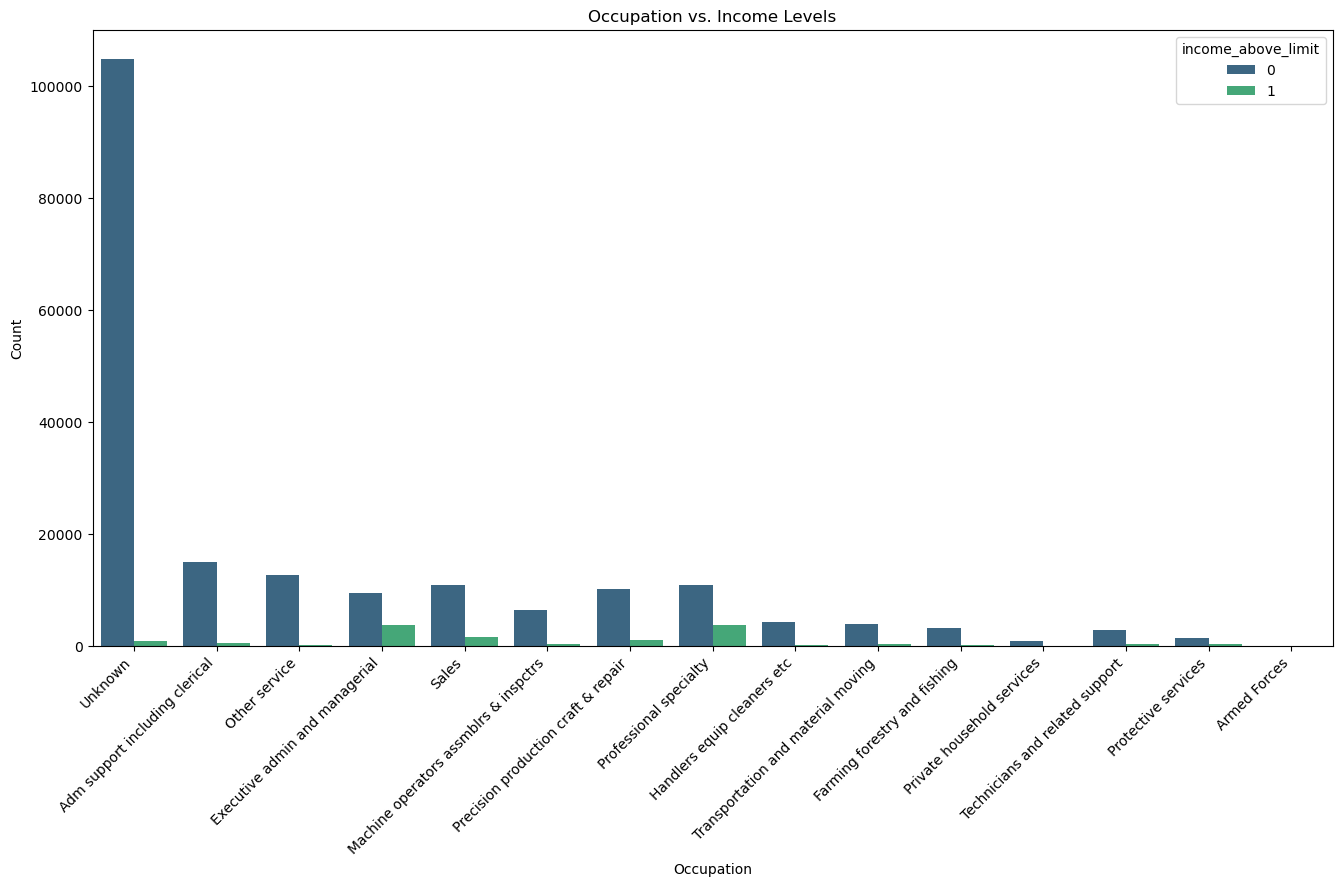

In [64]:
# Countplot for Occupation and Income Levels
plt.figure(figsize=(16, 8))
sns.countplot(x='occupation_code_main', hue='income_above_limit', data=train_df, palette='viridis')
plt.title('Occupation vs. Income Levels')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Insights:**
# - Explore the distribution of income levels across different occupation categories.
# - Identify occupations where individuals are more likely to have incomes above the threshold.

### Ix. How does tax status correspond to income levels?

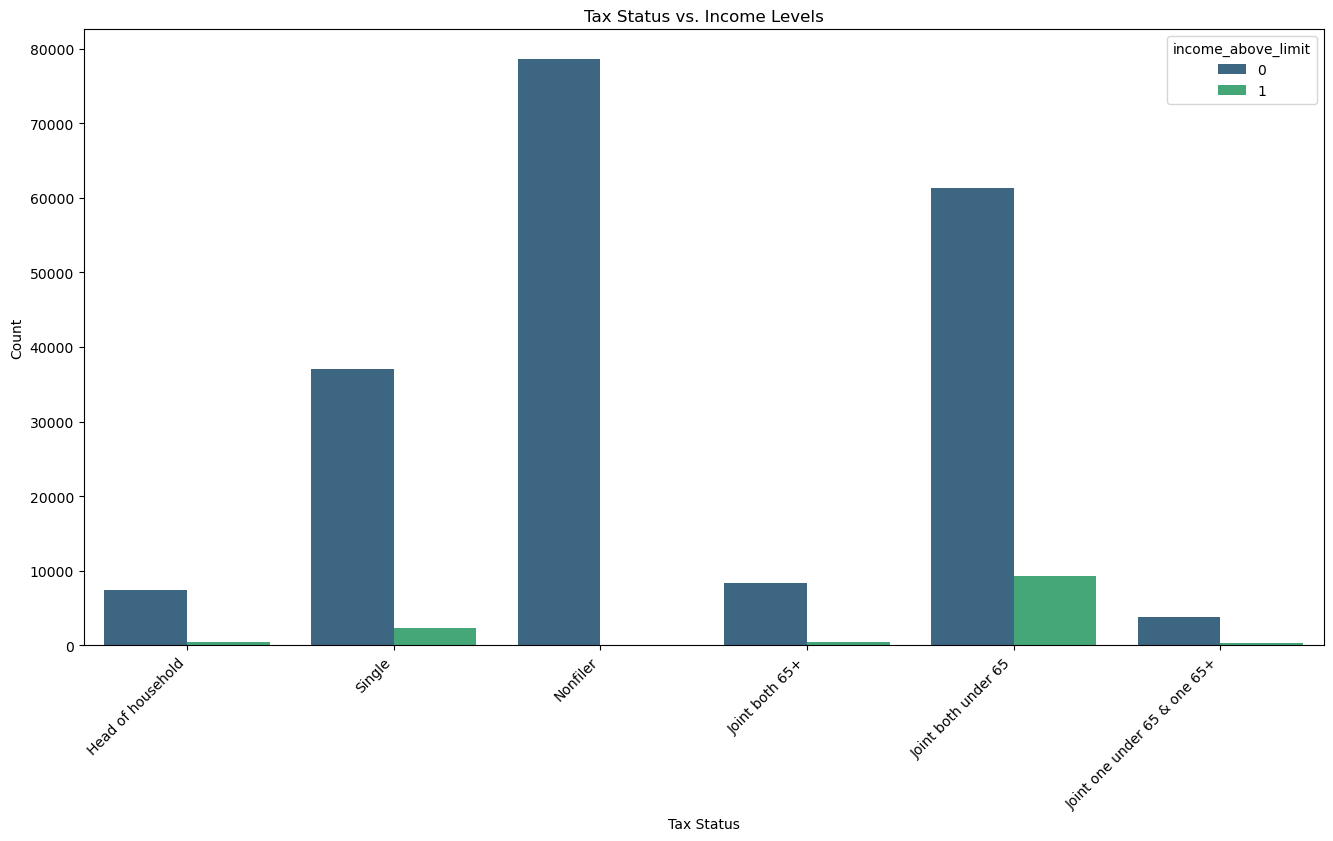

In [65]:
# Countplot for Tax Status and Income Levels
plt.figure(figsize=(16, 8))
sns.countplot(x='tax_status', hue='income_above_limit', data=train_df, palette='viridis')
plt.title('Tax Status vs. Income Levels')
plt.xlabel('Tax Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Feature Engineering

In [66]:
# Check for the unique values of the columns
for column in train_df:
    # Check unique values to assess relevance
    unique_values = train_df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")
    print('===' * 26)
    print()

Unique values for 'ID': ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']

Unique values for 'age': [79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87]

Unique values for 'gender': ['Female' 'Male']

Unique values for 'education': ['High school graduate' '12th grade no diploma' 'Children'
 'Bachelors degree(BA AB BS)' '7th and 8th grade' '11th grade' '9th grade'
 'Masters degree(MA MS MEng MEd MSW MBA)' '10th grade'
 'Associates degree-academic program' '1st 2nd 3rd or 4th grade'
 'Some college but no degree' 'Less than 1st grade'
 'Associates degree-occup /vocational'
 'Prof school degree (MD DDS DVM LLB JD)' '5th or 6th grade'
 'Doctorate degree(PhD EdD)']

Unique values for 'class': ['Private' 'Federal government' 'Local governme

Unique values for 'stocks_status': [ 292    0  400 ... 5531 5149 3508]

Unique values for 'citizenship': ['Native' 'Foreign born- Not a citizen of U S'
 'Foreign born- U S citizen by naturalization'
 'Native- Born abroad of American Parent(s)'
 'Native- Born in Puerto Rico or U S Outlying']

Unique values for 'mig_year': [95 94]

Unique values for 'country_of_birth_own': ['US' 'El-Salvador' 'Mexico' 'Philippines' 'Cambodia' 'China' 'Hungary'
 'Puerto-Rico' 'England' 'Dominican-Republic' 'Japan' 'Canada' 'Ecuador'
 'Italy' 'Cuba' 'Peru' 'Taiwan' 'South Korea' 'Poland' 'Nicaragua'
 'Germany' 'Guatemala' 'India' 'Ireland' 'Honduras' 'France'
 'Trinadad&Tobago' 'Thailand' 'Iran' 'Vietnam' 'Portugal' 'Laos' 'Panama'
 'Scotland' 'Columbia' 'Jamaica' 'Greece' 'Haiti' 'Yugoslavia'
 'Outlying-U S (Guam USVI etc)' 'Holand-Netherlands' 'Hong Kong']

Unique values for 'country_of_birth_father': ['US' 'India' 'Poland' 'Germany' 'El-Salvador' 'Mexico' 'Puerto-Rico'
 'Philippines' 'Greece' 'Canada' '

## Rename Class Column to worker_class

In [67]:
# Rename the column in train_df
train_df = train_df.rename(columns={'class': 'worker_class'})

# Rename the column in test_df
test_df = test_df.rename(columns={'class': 'worker_class'})

## Missing Values Imputation

In [68]:
# Calculate the mode of 'is_hispanic' column
mode_value = train_df['is_hispanic'].mode()[0]

# Replace 'NA' values with the mode
train_df['is_hispanic'] = train_df['is_hispanic'].replace('NA', mode_value)
test_df['is_hispanic'] = test_df['is_hispanic'].replace('NA', mode_value)

In [69]:
train_df['is_hispanic'].unique()

array(['All other', 'Mexican-American', 'Central or South American',
       'Mexican (Mexicano)', 'Puerto Rican', 'Other Spanish', 'Cuban',
       'Do not know', 'Chicano'], dtype=object)

In [70]:
test_df['is_hispanic'].unique()

array(['All other', 'Central or South American', 'Puerto Rican',
       'Mexican (Mexicano)', 'Mexican-American', 'Chicano',
       'Other Spanish', 'Cuban', 'Do not know'], dtype=object)

## Feature Combination

Feature combination is a valuable technique where new features are created by mathematically merging existing ones to capture relationships between variables and may simplify a dataset and highlight essential information. In our case, let's focus on the combining the 'gains' and 'losses' columns

In [71]:
# # Feature Combination: Total Income
# train_df['total_income'] = train_df['gains'] - train_df['losses']
# test_df['total_income'] = test_df['gains'] - test_df['losses']

The new feature created, "total Income," is calculated by subtracting 'losses' from 'gains.' This combination results in a 'total_income' feature in both the train_df and test_df, representing net income by considering both gains and losses.

## Creating new Features

In [72]:
# # Creating 'born_in_us' feature
# train_df['born_in_us'] = (train_df['country_of_birth_own'] == 'US').astype(int)
# test_df['born_in_us'] = (test_df['country_of_birth_own'] == 'US').astype(int)

We are introducing a binary feature named 'born_in_us' to indicate an individual's place of birth in the United States. This feature is coded as 1 for "Yes" (born in the US) and 0 for "No" (born outside the US). The 'born_in_us' feature carries significance in our income prediction task for several key reasons:

- **Cultural and Language Differences:** People born in the US may have distinct cultural and language backgrounds, potentially influencing their job opportunities and income levels.


- **Citizenship Status:** US-born individuals are more likely to be citizens, impacting job eligibility and government benefit entitlement, which can, in turn, affect income.


- **Discrimination:** Discrimination based on nationality or ethnicity can play a role in income disparities. US-born individuals may encounter different forms of discrimination compared to immigrants.


- **Education and Training:** Place of birth can shape an individual's access to education and training, directly influencing their income-earning potential.

By incorporating the 'born_in_us' feature, our machine learning model gains the ability to capture these socio-economic dynamics, potentially enhancing the accuracy of income predictions. This feature aids the model in comprehending income variations based on an individual's birthplace.

## Drop Unncessary Columns

In [73]:
# Create a copy of the dataframes
train_df_final=train_df.copy()
test_df_final=test_df.copy()

# Drop Unnecessary Columns
cols_to_drop = ['ID', 'country_of_birth_father', 'country_of_birth_mother']

train_df_final = train_df_final.drop(columns=cols_to_drop)
test_df_final = test_df_final .drop(columns=cols_to_drop)

The columns "country_of_birth_father," and "country_of_birth_mother" represent the birthplaces of different family members. While these columns might provide interesting demographic information, their impact on one's income is likely to be indirect. In other words, the specific country of birth of a person's parents may not directly determine their income. We drop the columns "ID", "country_of_birth_father" and "country_of_birth_mother" to simplify our analysis and reduce the risk of introducing unnecessary complexity in our model.

## Extract the target column and drop it from the train dataset

In [74]:
# Extract the target column
target_df = train_df_final['income_above_limit']
target_df = pd.DataFrame(target_df)
target_df.head()

,income_above_limit
0,0
1,0
2,0
3,0
4,0


In [75]:
# Drop it from the train dataset
train_df_final = train_df_final.drop('income_above_limit', axis=1)
train_df_final.head()

,age,gender,education,worker_class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,importance_of_record
0,79,Female,High school graduate,Private,Widowed,White,All other,Not in labor force,0,0,...,Householder,2,Head of household,0,0,292,Native,95,US,1779.74
1,65,Female,High school graduate,Private,Widowed,White,All other,Children or Armed Forces,0,0,...,Householder,2,Single,0,0,0,Native,94,US,2366.75
2,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,...,Child 18 or older,2,Single,0,0,0,Native,94,US,1693.42
3,2,Female,Children,Private,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,1380.27
4,70,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,1580.79


## Balancing the Training Set

In [76]:
# Check the class distribution in the training set
print("Class distribution before balancing:")
print(target_df.value_counts())

Class distribution before balancing:
income_above_limit
0                     196501
1                      12998
dtype: int64


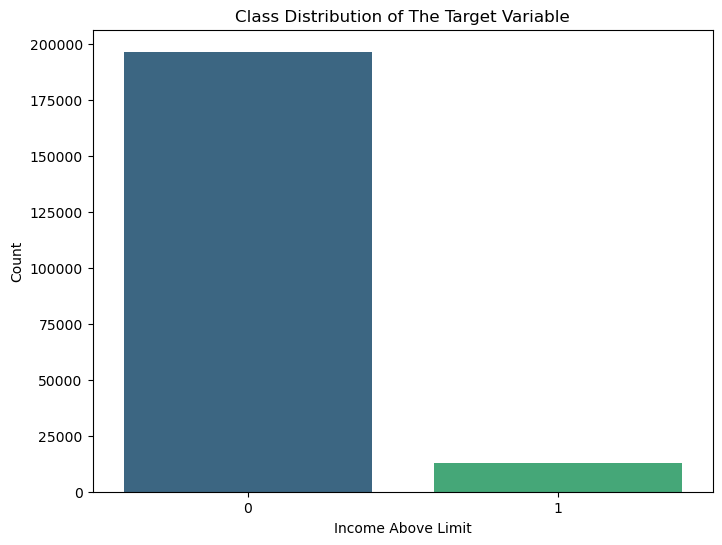

In [77]:
# Count the occurrences of each class in the dataset
class_counts = target_df['income_above_limit'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Income Above Limit')
plt.ylabel('Count')
plt.title('Class Distribution of The Target Variable')
plt.show()

**Below limit Class:** There are 110332 instances of participants below the income threshold in the Training Set.

**Above limit Class:** There are 10397 instances of participants below the income threshold in the Training Set.

The class distribution shows that there is some **class imbalance**, with the **below limit class having more instances than the above limit class.** Addressing this class imbalance is important to ensure that the machine learning model can make accurate predictions for both classes and is not biased towards the majority class.

In [78]:
# Balance the training set using Random Oversampling
oversampler = RandomOverSampler(random_state=42)
train_df_balanced, target_df_balanced = oversampler.fit_resample(train_df_final, target_df)

# Check the class distribution after balancing
balanced_class_counts = target_df_balanced.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
income_above_limit
0                     196501
1                     196501
dtype: int64


In [79]:
train_df_balanced.shape

(393002, 27)

In [80]:
target_df_balanced.shape

(393002, 1)

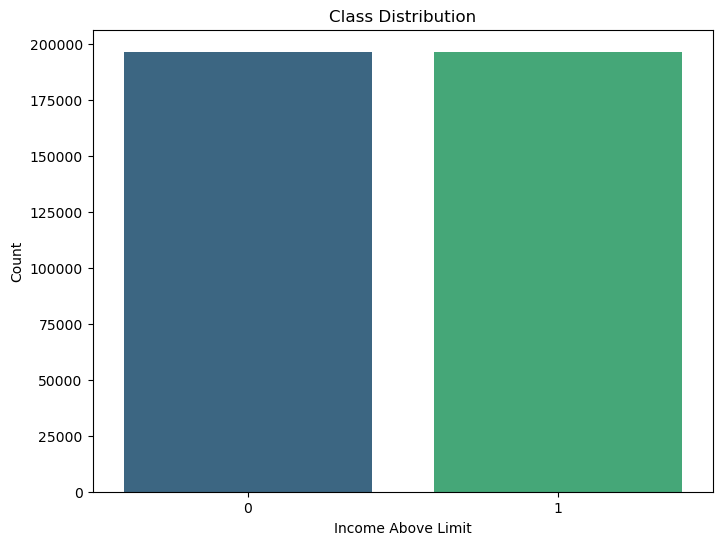

In [81]:
# Count the occurrences of each class in the balanced dataset
class_counts = target_df_balanced['income_above_limit'].value_counts()

# Create a bar plot with the 'viridis' color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Income Above Limit')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

The train set is now balanced.

## Encoding Categorical Variables

In [82]:
# Select only the categorical columns
categorical_columns = train_df_final.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'education', 'worker_class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'industry_code_main',
       'occupation_code_main', 'household_stat', 'household_summary',
       'tax_status', 'citizenship', 'country_of_birth_own'],
      dtype='object')

In [83]:
# Initialize the OrdinalEncoder object
ordinal_encoder = OrdinalEncoder()

# Encode categorical columns
train_df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(train_df_balanced[categorical_columns]),
                                columns=ordinal_encoder.get_feature_names_out(categorical_columns),
                                index=train_df_balanced.index)

# Combine with non-categorical columns
train_df_combined = pd.concat([train_df_balanced[train_df_balanced.columns.difference(categorical_columns)], train_df_encoded], axis=1)

# Reorder columns to match the original order
train_df_combined = train_df_combined[train_df_balanced.columns]

# Display the combined DataFrame
train_df_combined.head()

,age,gender,education,worker_class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,importance_of_record
0,79,0.0,12.0,3.0,6.0,4.0,0.0,2.0,0,0,...,4.0,2,0.0,0,0,292,2.0,95,39.0,1779.74
1,65,0.0,12.0,3.0,6.0,4.0,0.0,0.0,0,0,...,4.0,2,5.0,0,0,0,2.0,94,39.0,2366.75
2,21,1.0,2.0,0.0,4.0,2.0,0.0,0.0,0,500,...,0.0,2,5.0,0,0,0,2.0,94,39.0,1693.42
3,2,0.0,10.0,3.0,4.0,1.0,0.0,0.0,0,0,...,2.0,0,4.0,0,0,0,2.0,94,39.0,1380.27
4,70,1.0,12.0,3.0,2.0,4.0,0.0,2.0,0,0,...,7.0,2,1.0,0,0,0,2.0,95,39.0,1580.79


In [84]:
# Save the preprocessed datasets
train_df_combined.to_csv('data/train_df_preprocessed.csv', index=False)
test_df_final.to_csv('data/test_df_preprocessed.csv', index=False)

# Modeling

In [85]:
# Reading test dataset
train_df_preprocessed = pd.read_csv('data/train_df_preprocessed.csv')
test_df_preprocessed = pd.read_csv('data/test_df_preprocessed.csv')

In [86]:
train_df_preprocessed.head()

,age,gender,education,worker_class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,importance_of_record
0,79,0.0,12.0,3.0,6.0,4.0,0.0,2.0,0,0,...,4.0,2,0.0,0,0,292,2.0,95,39.0,1779.74
1,65,0.0,12.0,3.0,6.0,4.0,0.0,0.0,0,0,...,4.0,2,5.0,0,0,0,2.0,94,39.0,2366.75
2,21,1.0,2.0,0.0,4.0,2.0,0.0,0.0,0,500,...,0.0,2,5.0,0,0,0,2.0,94,39.0,1693.42
3,2,0.0,10.0,3.0,4.0,1.0,0.0,0.0,0,0,...,2.0,0,4.0,0,0,0,2.0,94,39.0,1380.27
4,70,1.0,12.0,3.0,2.0,4.0,0.0,2.0,0,0,...,7.0,2,1.0,0,0,0,2.0,95,39.0,1580.79


In [87]:
train_df_preprocessed.isnull().sum()

age                      0
gender                   0
education                0
worker_class             0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
occupation_code_main     0
total_employed           0
household_stat           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
country_of_birth_own     0
importance_of_record     0
dtype: int64

In [88]:
train_df_preprocessed.dtypes

age                        int64
gender                   float64
education                float64
worker_class             float64
marital_status           float64
race                     float64
is_hispanic              float64
employment_commitment    float64
employment_stat            int64
wage_per_hour              int64
working_week_per_year      int64
industry_code              int64
industry_code_main       float64
occupation_code            int64
occupation_code_main     float64
total_employed             int64
household_stat           float64
household_summary        float64
vet_benefit                int64
tax_status               float64
gains                      int64
losses                     int64
stocks_status              int64
citizenship              float64
mig_year                   int64
country_of_birth_own     float64
importance_of_record     float64
dtype: object

In [89]:
target_df_balanced.shape

(393002, 1)

In [90]:
train_df_preprocessed.shape

(393002, 27)

## Dataset Splitting

In [91]:
# Define your feature matrix 'X' and target variable 'y'
X = train_df_preprocessed
y = target_df_balanced['income_above_limit']

# Split the data into a training set and an evaluation set (i.e., 80% training, 20% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Training Set (X_train, y_train): This contains a random 80% portion of your data, used for training your model. The train_test_split function is configured to ensure that the class distribution (stratification) is preserved in this set, making it representative of the original data.

- Evaluation Set (X_eval, y_eval): This holds the remaining 20% of your data and is used to assess your model's performance. It's also stratified to maintain a similar class distribution.

The random_state parameter ensures reproducibility, as the same random split will occur if the same value is used in future runs.

 The stratify parameter is especially useful when dealing with class-imbalanced datasets to ensure that both sets have a proportional representation of classes.

In [92]:
print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (314401, 27) (314401,)
Shape of the Evaluation Set (X_eval, y_eval): (78601, 27) (78601,)


## Scaling The Numerical Values in the Training and Evaluation Sets

In [93]:
# Identify numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_numerical = X_train[numerical_columns]
X_eval_numerical = X_eval[numerical_columns]

In [94]:
# Scale the training and evaluation sets
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train_numerical)

# Scale the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval_numerical)

In [95]:
# Convert scaled NumPy arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns)
X_eval_scaled_df = pd.DataFrame(X_eval_scaled, columns=numerical_columns)

# Now, X_train_scaled_df and X_eval_scaled_df are DataFrames containing the scaled features.


# Now, y_train_balanced_df is a DataFrame containing the balanced target variable.

# Confirm the shapes of the DataFrames
print("Shape of X_train_scaled_df:", X_train_scaled_df.shape)
print("Shape of X_eval_scaled_df:", X_eval_scaled_df.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_eval:", y_eval.shape)

Shape of X_train_scaled_df: (314401, 27)
Shape of X_eval_scaled_df: (78601, 27)
Shape of y_train: (314401,)
Shape of y_eval: (78601,)


In [96]:
X_train_scaled_df.dtypes

age                      float64
gender                   float64
education                float64
worker_class             float64
marital_status           float64
race                     float64
is_hispanic              float64
employment_commitment    float64
employment_stat          float64
wage_per_hour            float64
working_week_per_year    float64
industry_code            float64
industry_code_main       float64
occupation_code          float64
occupation_code_main     float64
total_employed           float64
household_stat           float64
household_summary        float64
vet_benefit              float64
tax_status               float64
gains                    float64
losses                   float64
stocks_status            float64
citizenship              float64
mig_year                 float64
country_of_birth_own     float64
importance_of_record     float64
dtype: object

In [97]:
X_eval_scaled_df.dtypes

age                      float64
gender                   float64
education                float64
worker_class             float64
marital_status           float64
race                     float64
is_hispanic              float64
employment_commitment    float64
employment_stat          float64
wage_per_hour            float64
working_week_per_year    float64
industry_code            float64
industry_code_main       float64
occupation_code          float64
occupation_code_main     float64
total_employed           float64
household_stat           float64
household_summary        float64
vet_benefit              float64
tax_status               float64
gains                    float64
losses                   float64
stocks_status            float64
citizenship              float64
mig_year                 float64
country_of_birth_own     float64
importance_of_record     float64
dtype: object

In [98]:
y_train.dtypes

dtype('int64')

In [99]:
y_eval.dtypes

dtype('int64')

In [100]:
X_train_scaled_df.head()

,age,gender,education,worker_class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,importance_of_record
0,0.066667,1.0,0.6250,0.428571,0.666667,1.0,0.000,0.000000,0.0,0.0,...,0.285714,0.0,0.8,0.000000,0.0,0.0,0.5,1.0,0.95122,0.070875
1,0.244444,0.0,0.4375,0.428571,0.666667,1.0,0.375,0.000000,0.0,0.0,...,0.000000,1.0,1.0,0.000000,0.0,0.0,0.5,0.0,0.95122,0.055959
2,0.477778,1.0,0.5625,0.714286,0.333333,1.0,0.000,0.142857,0.0,0.0,...,0.571429,1.0,0.4,0.000000,0.0,0.0,0.5,1.0,0.95122,0.178602
3,0.433333,0.0,0.8750,0.714286,0.000000,1.0,0.000,0.142857,1.0,0.0,...,0.571429,1.0,1.0,0.135501,0.0,0.0,0.5,1.0,0.95122,0.090342
4,0.544444,0.0,0.8750,0.142857,0.333333,1.0,0.000,0.142857,0.0,0.0,...,1.000000,1.0,0.4,0.000000,0.0,0.0,0.5,1.0,0.95122,0.071300


## Model Training and Evaluation

In [101]:
# Initialize an empty dictionary named 'Results' to store the evaluation results for different models.
Results = {'Model':[], 'Acurracy':[], 'Precision':[], 'Recall':[], 'F1':[]}

In [102]:
# Converting the dictionary Results into a pandas DataFrame.
Results = pd.DataFrame(Results)
Results.head()

,Model,Acurracy,Precision,Recall,F1


### i. CatBoost Classifier

In the context of our income prediction problem, we have encountered a dataset with numerous categorical features, some of which have a large number of unique values. This can pose challenges in terms of encoding and model performance. To address these issues, we have opted for CatBoost, an open-source boosting library developed by Yandex. Here's why we've chosen CatBoost as our modeling solution:

**1. Automatic Categorical Feature Handling:** CatBoost offers a unique advantage by automatically handling categorical features. Unlike traditional models that require extensive feature encoding using techniques like One-Hot Encoding or Label Encoding, CatBoost can directly work with categorical data. This simplifies the preprocessing step and ensures that we can utilize our categorical features without manual intervention.

**2. Handling Missing Values:** CatBoost excels in handling missing values. It utilizes an algorithm called Symmetric Weighted Quantile Sketch (SWQS) to automatically manage missing data. This not only simplifies the preprocessing process but also reduces the risk of overfitting, contributing to improved overall model performance.

**3. Streamlined Feature Scaling:** Another benefit of CatBoost is its built-in feature scaling. It takes care of scaling all columns uniformly, saving us the effort of manually converting columns. This helps streamline the data preparation phase.

**4. Built-in Cross-Validation:** CatBoost includes a built-in cross-validation method, simplifying the task of selecting the best hyperparameters for our model. This ensures that our model's performance is optimized without the need for extensive manual tuning.

**5. Regularization Techniques:** CatBoost supports both L1 and L2 regularization methods. These techniques are valuable for reducing overfitting and enhancing the model's ability to generalize well to unseen data.

By choosing CatBoost, we aim to efficiently address the challenges posed by our dataset, particularly the extensive set of categorical features with many unique values. CatBoost not only simplifies the modeling process but also enhances the model's performance. It's a robust solution for our income prediction problem.


In [103]:
# In this part, we will convert categorical columns to string data type and capture the indices where string datatype is 
# present.
# These indices will be used for the CatBoost model.

# Selecting object data type columns (categorical columns) in the training dataset
cat_cols_index = np.where(train_df_balanced.dtypes == 'object')[0]
print("The indices of the categorical columns are:")
print(cat_cols_index)
print()


for i in range(len(X_train_scaled_df.columns)):
    if i in cat_cols_index:
        X_train_scaled_df[X_train_scaled_df.columns[i]] = X_train_scaled_df[X_train_scaled_df.columns[i]].astype(str)
        X_eval_scaled_df[X_train_scaled_df.columns[i]] = X_eval_scaled_df[X_train_scaled_df.columns[i]].astype(str)
        # Replace 'test_df' with your test data variable if needed
        test_df_preprocessed[X_train_scaled_df.columns[i]] = test_df_preprocessed[X_train_scaled_df.columns[i]].astype(str)

# Initialize the CatBoostClassifier model
model = CatBoostClassifier(random_state=42, n_estimators=50)

# Fit the CatBoost model on the training data with categorical features specified
catboost_model = model.fit(X_train_scaled_df, y_train, cat_features=cat_cols_index)

The indices of the categorical columns are:
[ 1  2  3  4  5  6  7 12 14 16 17 19 23 25]

Learning rate set to 0.5
0:	learn: 0.3967261	total: 2.12s	remaining: 1m 43s
1:	learn: 0.3417264	total: 3.84s	remaining: 1m 32s
2:	learn: 0.3205339	total: 5.72s	remaining: 1m 29s
3:	learn: 0.3094254	total: 7.3s	remaining: 1m 23s
4:	learn: 0.3041005	total: 9.2s	remaining: 1m 22s
5:	learn: 0.2993756	total: 11.8s	remaining: 1m 26s
6:	learn: 0.2955704	total: 14.7s	remaining: 1m 30s
7:	learn: 0.2924917	total: 19.3s	remaining: 1m 41s
8:	learn: 0.2902843	total: 25s	remaining: 1m 53s
9:	learn: 0.2869275	total: 28.7s	remaining: 1m 54s
10:	learn: 0.2850845	total: 31s	remaining: 1m 49s
11:	learn: 0.2830231	total: 34.1s	remaining: 1m 47s
12:	learn: 0.2803761	total: 36.4s	remaining: 1m 43s
13:	learn: 0.2793283	total: 38.2s	remaining: 1m 38s
14:	learn: 0.2779817	total: 40.5s	remaining: 1m 34s
15:	learn: 0.2768040	total: 43.8s	remaining: 1m 32s
16:	learn: 0.2752505	total: 49.8s	remaining: 1m 36s
17:	learn: 0.27411

In [104]:
# Use the trained CatBoost model to make predictions on the evaluation set
y_pred_eval = catboost_model.predict(X_eval_scaled_df)

# Calculate the accuracy on the evaluation set
accuracy = accuracy_score(y_pred_eval, y_eval)

# Print the accuracy with a colored text message
print(colored(f'The accuracy attained on the validation set is {accuracy:.2%}', 'green', attrs=['bold']))

The accuracy attained on the validation set is 89.42%


In [105]:
print('The classification report only on the validation data:')
print(colored(classification_report(y_eval, model.predict(X_eval_scaled_df)),'blue',attrs=['bold']))

print('The classification report only on the train data:')
print(colored(classification_report(y_train, model.predict(X_train_scaled_df)),'green',attrs=['bold']))

The classification report only on the validation data:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     39301
           1       0.88      0.91      0.90     39300

    accuracy                           0.89     78601
   macro avg       0.89      0.89      0.89     78601
weighted avg       0.89      0.89      0.89     78601

The classification report only on the train data:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89    157200
           1       0.88      0.92      0.90    157201

    accuracy                           0.90    314401
   macro avg       0.90      0.90      0.90    314401
weighted avg       0.90      0.90      0.90    314401



In [106]:
thresh     = 0.4
train_pred = np.where(model.predict_proba(X_train_scaled_df)[:,1]>thresh,1,0)
test_pred  = np.where(model.predict_proba(X_eval_scaled_df)[:,1]>thresh,1,0)

print('\n')
print('The classification report for the validation data:')
print(colored(classification_report(y_eval,test_pred),'blue',attrs=['bold']))
print('===' * 20)
print('\n')

print('The classification report for the train data:')
print(colored(classification_report(y_train, train_pred),'green',attrs=['bold']))



The classification report for the validation data:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88     39301
           1       0.85      0.94      0.90     39300

    accuracy                           0.89     78601
   macro avg       0.90      0.89      0.89     78601
weighted avg       0.90      0.89      0.89     78601



The classification report for the train data:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89    157200
           1       0.86      0.94      0.90    157201

    accuracy                           0.89    314401
   macro avg       0.90      0.89      0.89    314401
weighted avg       0.90      0.89      0.89    314401



In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define your CatBoostClassifier
tuned_catboost_model = CatBoostClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],  # Adjust learning rates
    'depth': [4, 6, 8],  # Adjust depth
    'l2_leaf_reg': [1, 3, 5],  # Adjust L2 regularization
}

# Define the scoring metric you want to optimize (e.g., F1-score)
scoring = make_scorer(f1_score, average='binary')

# Create a GridSearchCV instance
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring=scoring, verbose=2, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train_scaled_df, y_train, cat_features=cat_cols_index)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best model to make predictions on your evaluation set
y_pred_eval = best_estimator.predict(X_eval_scaled_df)

# Calculate the F1-score on the evaluation set
f1_eval = f1_score(y_eval, y_pred_eval)

# Print the best parameters, F1-score, and other metrics
print("Best Hyperparameters:", best_params)
print("F1-score on Evaluation Set:", f1_eval)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


The model performance did not improve on evaluation. Therefore, we save the previous model.

### Save The Model and Key Components

In [ ]:
# Extract and store the unique values
unique_values = {}
for column in train_df_preprocessed.columns:
    unique_values[column] = train_df_preprocessed[column].unique()

#Save unique values and model together in a single pickle file
file_path = 'data/model_and_key_components.pkl'

# Create a dictionary to store the components
saved_components = {
    'model': catboost_model,
    'unique_values': unique_values
}

# Save all components in a single pickle file
with open(file_path, 'wb') as file:
    pickle.dump(saved_components, file)

#### Test Prediction

In [ ]:
# View the head of the test dataset
test_df_preprocessed.head()

In [ ]:
# Create a copy of the test_df
test_pred = test_df_preprocessed.copy()
test_pred.head()

In [ ]:
# Define the file path from where you want to load the model
file_path = 'data/model_and_key_components.pkl'

# Load the model and components
with open(file_path, 'rb') as file:
    loaded_components = pickle.load(file)

# Load the model
loaded_model = loaded_components['model']

# Encode categorical columns
test_pred = preprocessor.fit_transform(test_pred)


# Perform Predictions
y_pred = loaded_model.predict(test_pred)

# Create a new DataFrame with the 'income_above_limit' predictions
test_predictions = test_pred.copy()
test_predictions['income_above_limit'] = y_pred

# Display Predictions (first few rows)
test_predictions.head()

In [ ]:
# Merge the 'test_df' and 'test_predictions' based on the common column 'ID'
merged_df = test_predictions.merge(test_df[['ID']], left_index=True, right_index=True)

# Now 'merged_df' contains the 'ID' column in addition to the data from 'test_predictions'
results = merged_df[['ID', 'income_above_limit']]
results.head()

In [ ]:
# Save the results dataframe to a csv file.
results.to_csv('data/results.csv', index=False)